In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample

- Pandas (import pandas as pd) - Used for reading, processing, and analyzing structured tabular data efficiently.

- NumPy (import numpy as np) - Provides support for numerical computations, arrays, and mathematical operations.
- LabelEncoder - Converts categorical labels into numeric form.
- OneHotEncoder - Creates binary columns for categorical variables.
- Matplotlib (import matplotlib.pyplot as plt) - Used for creating static, interactive, and animated visualizations like histograms and scatter plots.

- Seaborn (import seaborn as sns) - Enhances Matplotlib by providing high-level statistical data visualization tools.

- Missingno (import missingno as msno) - Helps visualize missing data patterns in datasets

In [3]:
data1_df = pd.read_csv("Myocardial Infarction.csv")
data1_df

ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL  \
0        1  77.0    1       2.0        1.0        1.0       2.0       NaN   
1        2  55.0    1       1.0        0.0        0.0       0.0       0.0   
2        3  52.0    1       0.0        0.0        0.0       2.0       NaN   
3        4  68.0    0       0.0        0.0        0.0       2.0       NaN   
4        5  60.0    1       0.0        0.0        0.0       2.0       NaN   
...    ...   ...  ...       ...        ...        ...       ...       ...   
1695  1696  77.0    0       0.0        4.0        2.0       1.0       NaN   
1696  1697  70.0    0       0.0        6.0        2.0       1.0       NaN   
1697  1698  55.0    1       3.0        6.0        2.0       2.0       NaN   
1698  1699  79.0    0       2.0        2.0        2.0       1.0       NaN   
1699  1700  63.0    1       2.0        NaN        NaN       NaN       NaN   

       GB  SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  \
0     3.0         0.0  ...          0           0         0          0   
1     0.0         0.0  ...          0           0         0          0   
2     2.0         0.0  ...          0           0         0          0   
3     2.0         0.0  ...          0           0         0          0   
4     3.0         0.0  ...          0           0         0          0   
...   ...         ...  ...        ...         ...       ...        ...   
1695  2.0         0.0  ...          0           0         1          0   
1696  2.0         0.0  ...          0           0         0          0   
1697  0.0         0.0  ...          0           0         0          0   
1698  2.0         0.0  ...          0           0         0          1   
1699  2.0         0.0  ...          0           0         0          0   

      RAZRIV  DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
0          0         0    0       0          0       0  
1          0         0    0       0          0       0  
2          0         0    0       0          0       0  
3          0         0    1       0          0       0  
4          0         0    0       0          0       0  
...      ...       ...  ...     ...        ...     ...  
1695       1         0    0       0          0       3  
1696       0         0    0       0          0       1  
1697       0         0    0       1          0       6  
1698       0         0    0       0          0       1  
1699       0         0    0       0          0       1  

[1700 rows x 124 columns]

In [4]:
data1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB


In [5]:
data1_df.describe()

ID          AGE          SEX     INF_ANAM    STENOK_AN  \
count  1700.000000  1692.000000  1700.000000  1696.000000  1594.000000   
mean    850.500000    61.856974     0.626471     0.554835     2.316186   
std     490.892045    11.259936     0.483883     0.836801     2.440586   
min       1.000000    26.000000     0.000000     0.000000     0.000000   
25%     425.750000    54.000000     0.000000     0.000000     0.000000   
50%     850.500000    63.000000     1.000000     0.000000     1.000000   
75%    1275.250000    70.000000     1.000000     1.000000     5.000000   
max    1700.000000    92.000000     1.000000     3.000000     6.000000   

         FK_STENOK     IBS_POST  IBS_NASL           GB   SIM_GIPERT  ...  \
count  1627.000000  1649.000000  72.00000  1691.000000  1692.000000  ...   
mean      1.205286     1.160703   0.37500     1.393258     0.033688  ...   
std       1.040814     0.801400   0.48752     1.088803     0.180478  ...   
min       0.000000     0.000000   0.00000     0.000000     0.000000  ...   
25%       0.000000     0.000000   0.00000     0.000000     0.000000  ...   
50%       2.000000     1.000000   0.00000     2.000000     0.000000  ...   
75%       2.000000     2.000000   1.00000     2.000000     0.000000  ...   
max       4.000000     2.000000   1.00000     3.000000     1.000000  ...   

         JELUD_TAH   FIBR_JELUD     A_V_BLOK    OTEK_LANC       RAZRIV  \
count  1700.000000  1700.000000  1700.000000  1700.000000  1700.000000   
mean      0.024706     0.041765     0.033529     0.093529     0.031765   
std       0.155273     0.200110     0.180067     0.291259     0.175425   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          DRESSLER          ZSN       REC_IM    P_IM_STEN       LET_IS  
count  1700.000000  1700.000000  1700.000000  1700.000000  1700.000000  
mean      0.044118     0.231765     0.093529     0.087059     0.477059  
std       0.205417     0.422084     0.291259     0.282004     1.381818  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     7.000000  

[8 rows x 124 columns]

In [6]:
print(data1_df.head())

   ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0   1  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1   2  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2   3  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3   4  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4   5  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   

   SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  RAZRIV  \
0         0.0  ...          0           0         0          0       0   
1         0.0  ...          0           0         0          0       0   
2         0.0  ...          0           0         0          0       0   
3         0.0  ...          0           0         0          0       0   
4         0.0  ...          0           0         0          0       0   

   DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
0         0    0       0          0       0  


In [7]:
print(data1_df.tail())

        ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL  \
1695  1696  77.0    0       0.0        4.0        2.0       1.0       NaN   
1696  1697  70.0    0       0.0        6.0        2.0       1.0       NaN   
1697  1698  55.0    1       3.0        6.0        2.0       2.0       NaN   
1698  1699  79.0    0       2.0        2.0        2.0       1.0       NaN   
1699  1700  63.0    1       2.0        NaN        NaN       NaN       NaN   

       GB  SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  \
1695  2.0         0.0  ...          0           0         1          0   
1696  2.0         0.0  ...          0           0         0          0   
1697  0.0         0.0  ...          0           0         0          0   
1698  2.0         0.0  ...          0           0         0          1   
1699  2.0         0.0  ...          0           0         0          0   

      RAZRIV  DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
1695       1         0    0       0

In [8]:
print(data1_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB
None


In [9]:
print(data1_df.describe())

                ID          AGE          SEX     INF_ANAM    STENOK_AN  \
count  1700.000000  1692.000000  1700.000000  1696.000000  1594.000000   
mean    850.500000    61.856974     0.626471     0.554835     2.316186   
std     490.892045    11.259936     0.483883     0.836801     2.440586   
min       1.000000    26.000000     0.000000     0.000000     0.000000   
25%     425.750000    54.000000     0.000000     0.000000     0.000000   
50%     850.500000    63.000000     1.000000     0.000000     1.000000   
75%    1275.250000    70.000000     1.000000     1.000000     5.000000   
max    1700.000000    92.000000     1.000000     3.000000     6.000000   

         FK_STENOK     IBS_POST  IBS_NASL           GB   SIM_GIPERT  ...  \
count  1627.000000  1649.000000  72.00000  1691.000000  1692.000000  ...   
mean      1.205286     1.160703   0.37500     1.393258     0.033688  ...   
std       1.040814     0.801400   0.48752     1.088803     0.180478  ...   
min       0.000000     0.0000

- df.head(): View first few rows
- df.info(): Check data types and missing values
- df.describe(): Summary statistics for continuous columns
- np.mean(), np.median(), np.std() for statistics
- df.fillna(np.mean(df)) → Fill missing values
- plt.plot(): Line plot
- plt.bar(): Bar chart
- plt.hist(): Histogram
- sns.histplot(): Distribution of a numerical variable
- sns.boxplot(): Detect outliers in continuous data
- sns.violinplot(): Combines box plot & KDE
- msno.heatmap(df): Shows missing value correlations

- head() and tail() : show a sample of the data at the beginning and end, allowing you to quickly check the data integrity.
- info() : gives a more detailed summary of the dataset, showing data types, missing values, and memory usage.
- describe():  offers statistics on numerical columns, allowing you to evaluate the central tendencies, spread, and potential outliers.

In [12]:
import pandas as pd

# Assuming you already have a DataFrame loaded as 'df'
# Checking for null values
null_values = data1_df.isnull().sum()

# Checking for duplicate rows
duplicates =data1_df.duplicated().sum()

# Print the results
print("Null values per column:\n", null_values)
print("\nTotal duplicate rows: ", duplicates)

Null values per column:
 ID             0
AGE            8
SEX            0
INF_ANAM       4
STENOK_AN    106
            ... 
DRESSLER       0
ZSN            0
REC_IM         0
P_IM_STEN      0
LET_IS         0
Length: 124, dtype: int64

Total duplicate rows:  0


In [13]:
#Dataframe attributes
print(data1_df.shape)
print(data1_df.size)

(1700, 124)
210800


##### Shape
- The (rows, columns), so it tells you how many rows and columns are in the DataFrame.
##### Size
- It calculates this by multiplying the number of rows by the number of columns.

In [15]:
data1_df[data1_df.duplicated(keep = False)]

Empty DataFrame
Columns: [ID, AGE, SEX, INF_ANAM, STENOK_AN, FK_STENOK, IBS_POST, IBS_NASL, GB, SIM_GIPERT, DLIT_AG, ZSN_A, nr_11, nr_01, nr_02, nr_03, nr_04, nr_07, nr_08, np_01, np_04, np_05, np_07, np_08, np_09, np_10, endocr_01, endocr_02, endocr_03, zab_leg_01, zab_leg_02, zab_leg_03, zab_leg_04, zab_leg_06, S_AD_KBRIG, D_AD_KBRIG, S_AD_ORIT, D_AD_ORIT, O_L_POST, K_SH_POST, MP_TP_POST, SVT_POST, GT_POST, FIB_G_POST, ant_im, lat_im, inf_im, post_im, IM_PG_P, ritm_ecg_p_01, ritm_ecg_p_02, ritm_ecg_p_04, ritm_ecg_p_06, ritm_ecg_p_07, ritm_ecg_p_08, n_r_ecg_p_01, n_r_ecg_p_02, n_r_ecg_p_03, n_r_ecg_p_04, n_r_ecg_p_05, n_r_ecg_p_06, n_r_ecg_p_08, n_r_ecg_p_09, n_r_ecg_p_10, n_p_ecg_p_01, n_p_ecg_p_03, n_p_ecg_p_04, n_p_ecg_p_05, n_p_ecg_p_06, n_p_ecg_p_07, n_p_ecg_p_08, n_p_ecg_p_09, n_p_ecg_p_10, n_p_ecg_p_11, n_p_ecg_p_12, fibr_ter_01, fibr_ter_02, fibr_ter_03, fibr_ter_05, fibr_ter_06, fibr_ter_07, fibr_ter_08, GIPO_K, K_BLOOD, GIPER_NA, NA_BLOOD, ALT_BLOOD, AST_BLOOD, KFK_BLOOD, L_BLOOD, ROE, TIME_B_S, R_AB_1_n, R_AB_2_n, R_AB_3_n, NA_KB, NOT_NA_KB, LID_KB, NITR_S, NA_R_1_n, ...]
Index: []

[0 rows x 124 columns]

- **Method**	**Use Case**	**Example**
- Label   Encoding	- Binary values (0,1)	- SEX → Female = 0, Male = 1
- One-Hot Encoding	- No order between categories	- GB → Separate columns GB_2, GB_3
- Ordinal Encoding	- Ordered categories	- INF_ANAM → No history = 0, Mild = 1, Severe = 2

- Nominal Data is a type of categorical data where the categories have no specific order or ranking.
- These are labels or names used to classify data.
- Examples of Nominal Data in our Dataset:
- SEX (Male = 1, Female = 0)
- GB (Different groups like 0, 2, 3, but no order between them)

<Axes: >

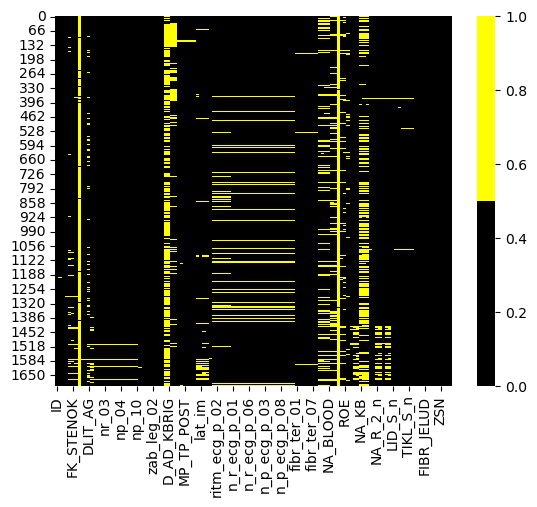

In [18]:
cols = data1_df.columns
colors = ['black', 'yellow']
sns.heatmap(data1_df[cols].isnull(),cmap=sns.color_palette(colors),cbar = True)

- A yellow square in the heatmap means a missing value (NaN) in that location.
- A black square means a valid (non-missing) value is present.

In [20]:
#find the mean and median values of each numeric columns
#Imputation of missing value with median
median_ozone = data1_df["ID"].median()
mean_ozone = data1_df["ID"].mean()
print("Median of ID: ", median_ozone)
print("Mean of ID: ", mean_ozone)

Median of ID:  850.5
Mean of ID:  850.5


In [21]:
median_ozone = data1_df["AGE"].median()
mean_ozone = data1_df["AGE"].mean()
print("Median of AGE: ", median_ozone)
print("Mean of AGE: ", mean_ozone)

Median of AGE:  63.0
Mean of AGE:  61.856973995271865


In [22]:
median_ozone = data1_df["SEX"].median()
mean_ozone = data1_df["SEX"].mean()
print("Median of SEX: ", median_ozone)
print("Mean of SEX: ", mean_ozone)

Median of SEX:  1.0
Mean of SEX:  0.6264705882352941


In [23]:
mean_solar = data1_df["ID"].mean()
print("Mean of ID: ", mean_solar)

Mean of ID:  850.5


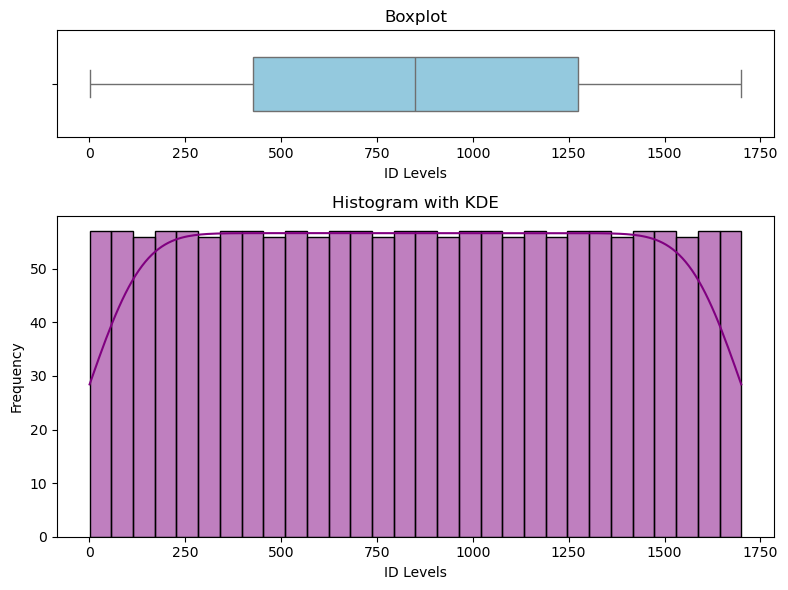

In [24]:
#Detection of outliers in the columns
#method1: Using histograms and box plots
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1,3]})

#plot the boxplot in the first (top) subplot
sns.boxplot(data=data1_df["ID"], ax=axes[0],color='skyblue', width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("ID Levels")

#plot the histogram with KDE curve in the second(bottom) subplot
sns.histplot(data1_df['ID'], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("ID Levels")
axes[1].set_ylabel("Frequency")

#Adujust layout for better spacing
plt.tight_layout()

#show the plot
plt.show()

- **Histogram**	Shows the distribution of a continuous variable	
- **Box Plot**	Displays the spread and outliers in the data
- **Violin Plot**	Combines box plot and density distribution

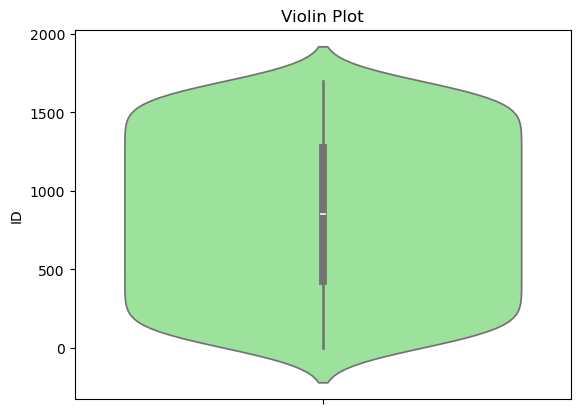

In [26]:
#Create a figure for violin in plot
sns.violinplot(data=data1_df["ID"], color='lightgreen')
plt.title("Violin Plot")
#Show the plot
plt.show()

 - The wider parts mean more values are present there.
- The narrower parts mean fewer values exist in that range.
- The middle box inside the violin is like a boxplot, showing the median and quartiles.
- This plot helps to see both the shape of the data distribution and important statistics in one view

#### Conclusion
- Use a histogram when analyzing the frequency distribution of a continuous variable.
- Use a box plot to identify outliers and compare categories.
- Use a violin plot when you need both a density plot and a box plot combined.
- We can plot all of these, but categorical variables need encoding or grouping first.

Text(0.5, 0, 'Theoretical Quantiles')

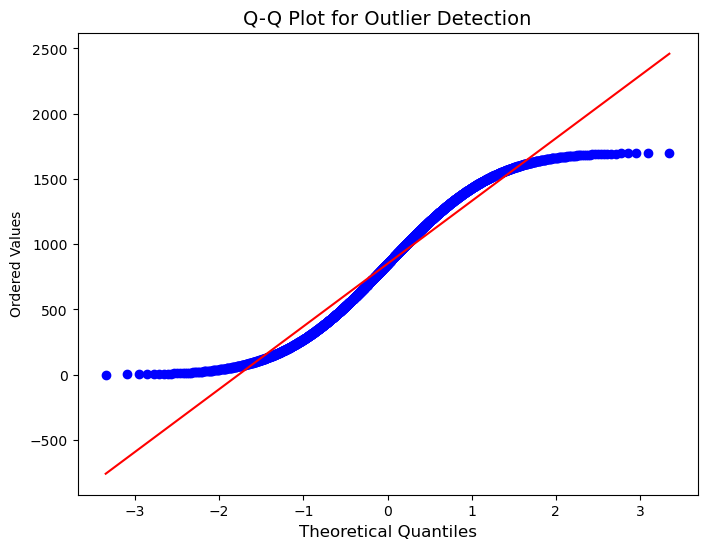

In [29]:
import scipy.stats as stats

#Create Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(data1_df["ID"], dist="norm", plot=plt)
plt.title("Q-Q Plot for Outlier Detection", fontsize=14)
plt.xlabel("Theoretical Quantiles", fontsize=12)

In [30]:
import pandas as pd

# Load the dataset
data1_df = pd.read_csv("Myocardial Infarction.csv")

# Print data types of all columns
print("\nChecking Data Types:")
print(data1_df.dtypes)

# Check for missing values
print("\nChecking for Missing Values:")
print(data1_df.isnull().sum())

# Identify numerical and categorical columns
numerical_columns = data1_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = data1_df.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

# Verify LET_IS as the target variable
if "LET_IS" in data1_df.columns:
    print("\nVerifying Target Variable (LET_IS):")
    print("Unique values:", data1_df["LET_IS"].unique())
    print("Value counts:")
    print(data1_df["LET_IS"].value_counts())
    print("Data type:", data1_df["LET_IS"].dtype)


Checking Data Types:
ID             int64
AGE          float64
SEX            int64
INF_ANAM     float64
STENOK_AN    float64
              ...   
DRESSLER       int64
ZSN            int64
REC_IM         int64
P_IM_STEN      int64
LET_IS         int64
Length: 124, dtype: object

Checking for Missing Values:
ID             0
AGE            8
SEX            0
INF_ANAM       4
STENOK_AN    106
            ... 
DRESSLER       0
ZSN            0
REC_IM         0
P_IM_STEN      0
LET_IS         0
Length: 124, dtype: int64

Numerical Columns: ['ID', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_P


Checking Data Types:
ID             int64
AGE          float64
SEX            int64
INF_ANAM     float64
STENOK_AN    float64
              ...   
DRESSLER       int64
ZSN            int64
REC_IM         int64
P_IM_STEN      int64
LET_IS         int64
Length: 124, dtype: object

Checking for Missing Values:
ID             0
AGE            8
SEX            0
INF_ANAM       4
STENOK_AN    106
            ... 
DRESSLER       0
ZSN            0
REC_IM         0
P_IM_STEN      0
LET_IS         0
Length: 124, dtype: int64

Numerical Columns: ['ID', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_P

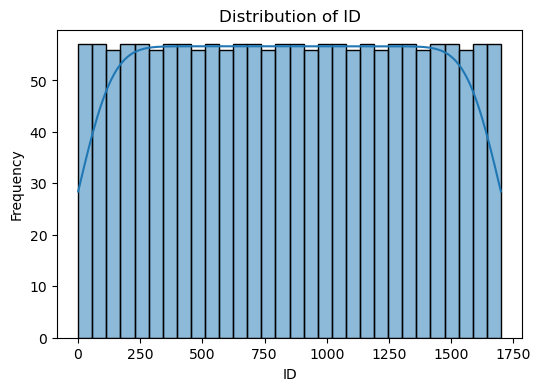

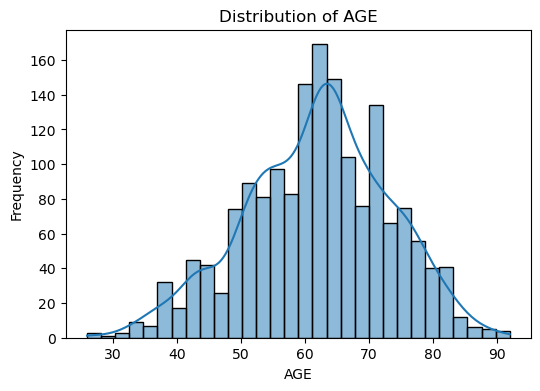

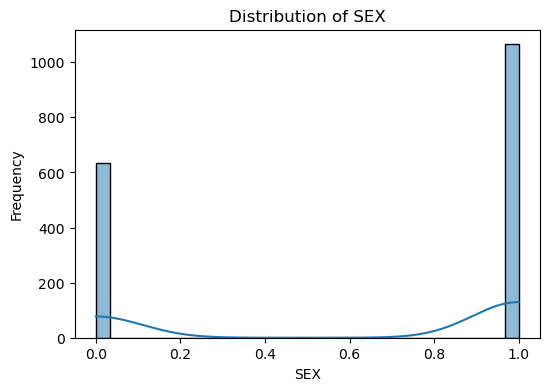

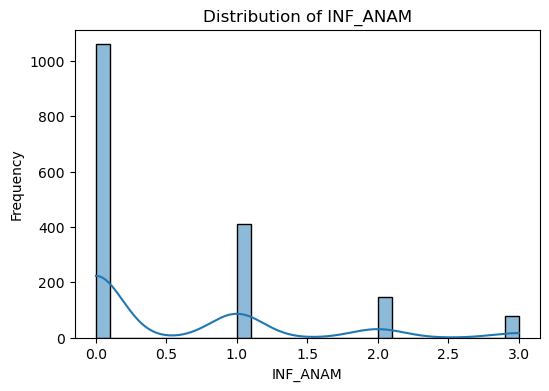

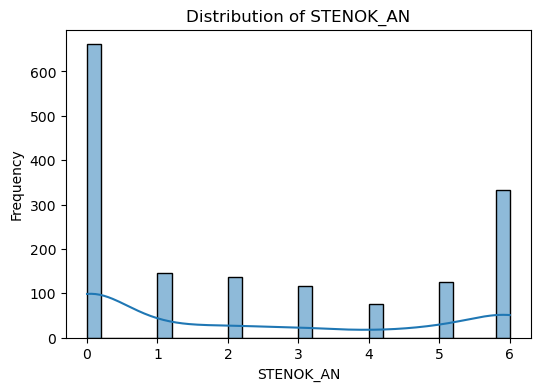

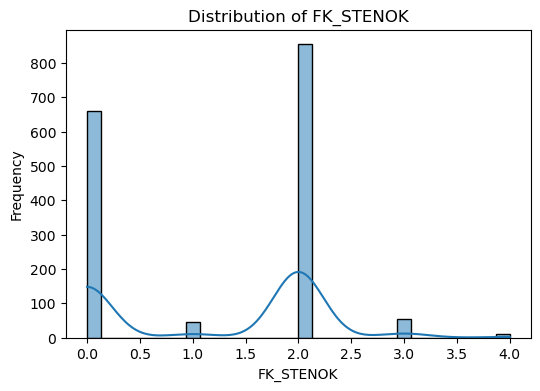

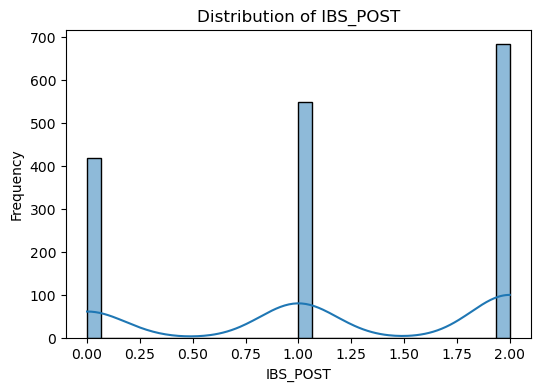

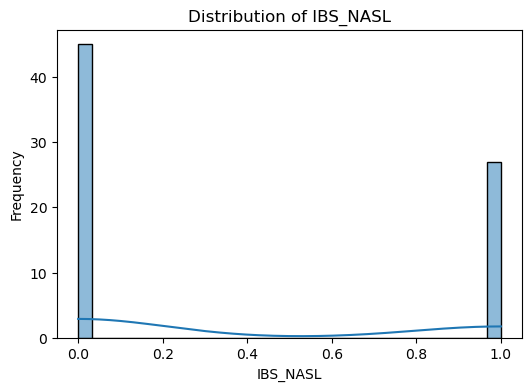

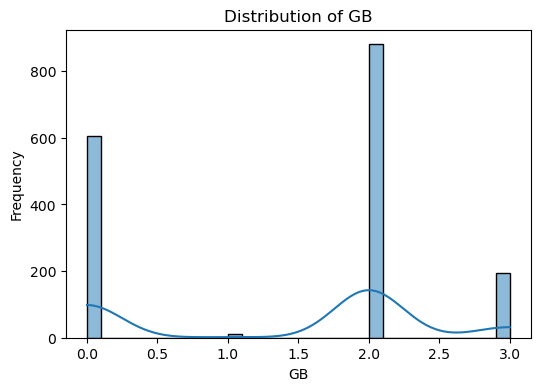

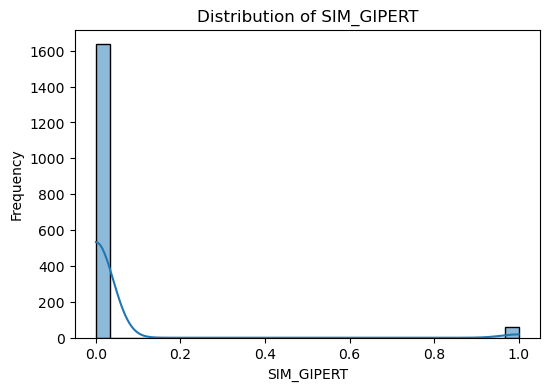

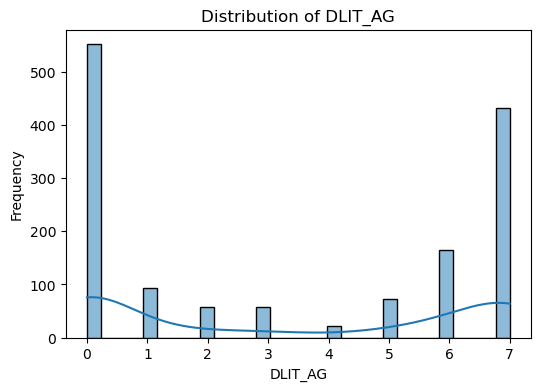

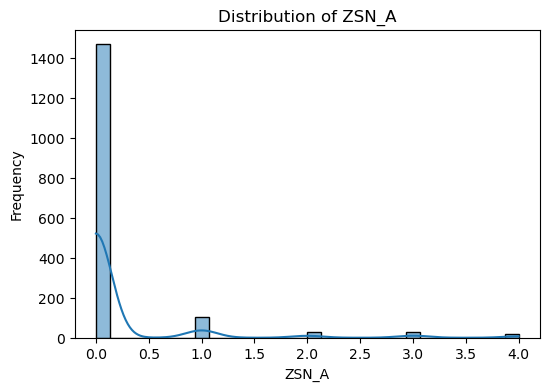

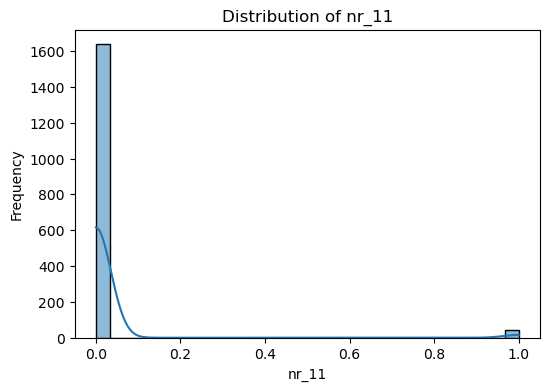

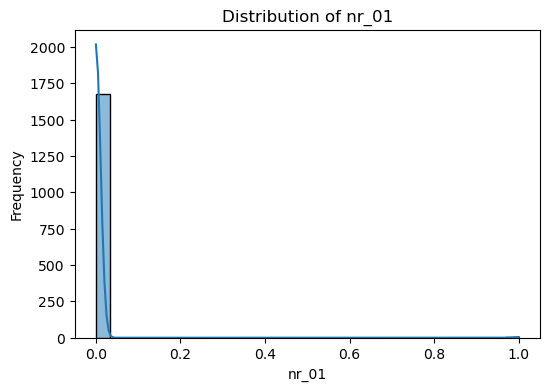

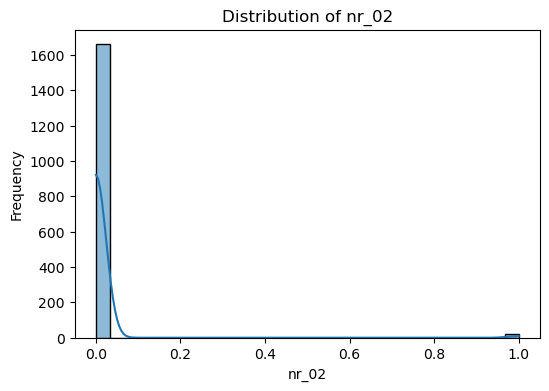

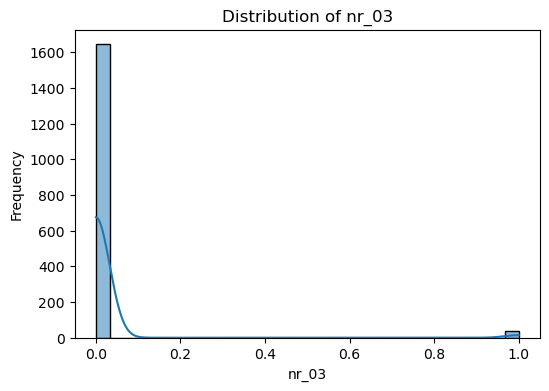

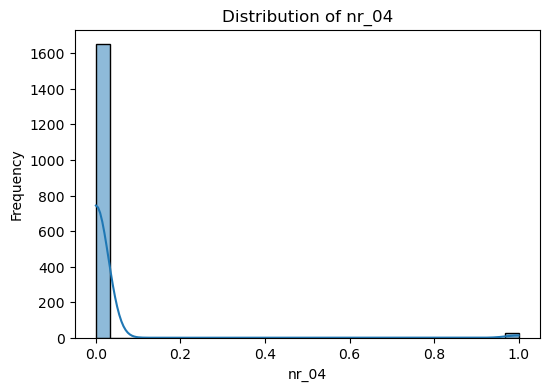

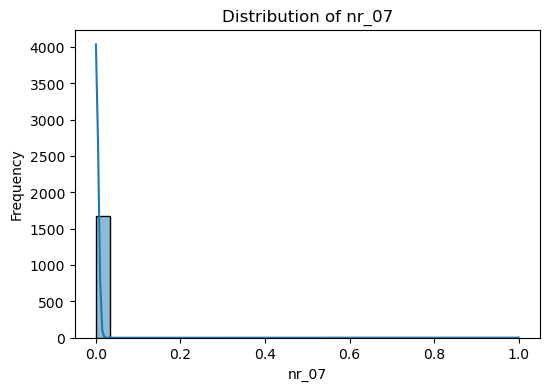

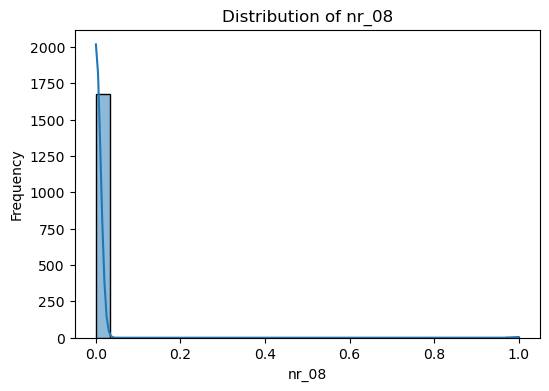

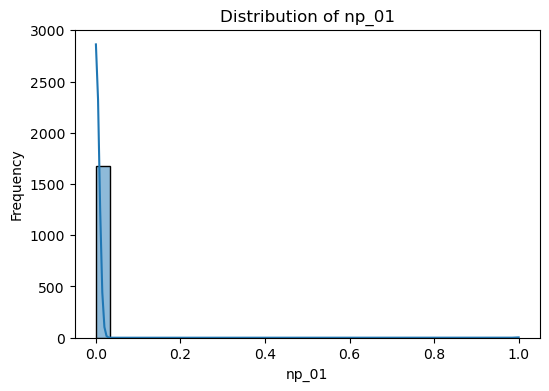

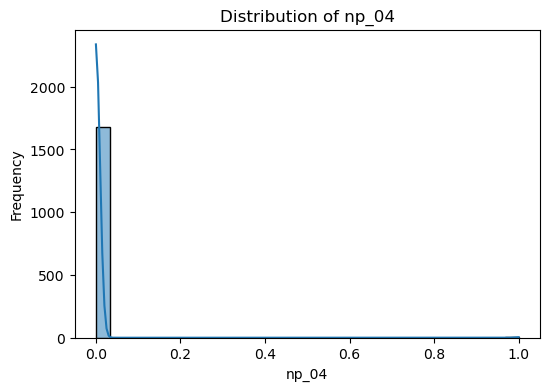

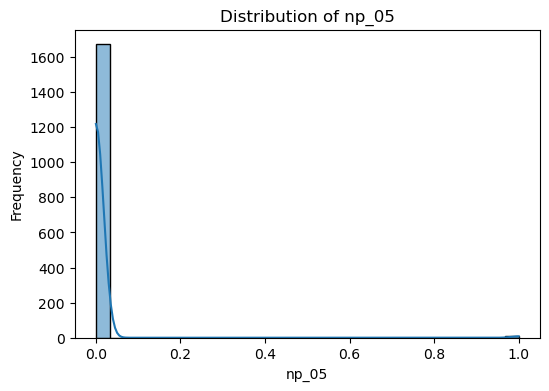

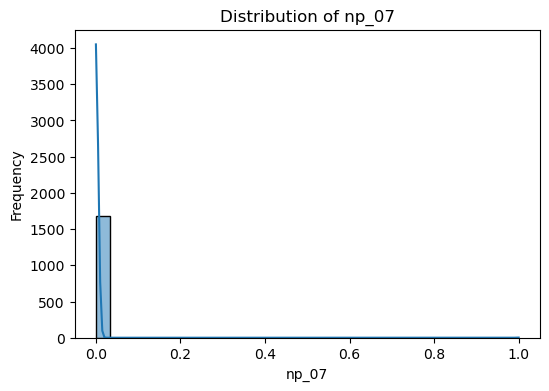

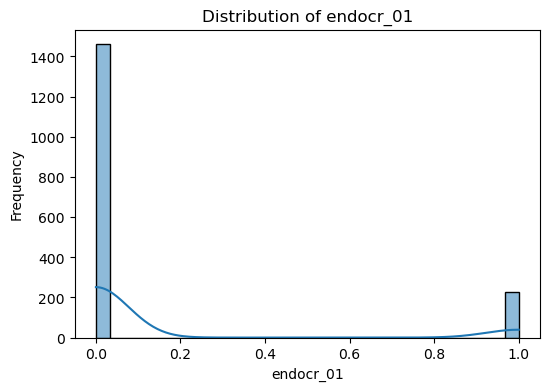

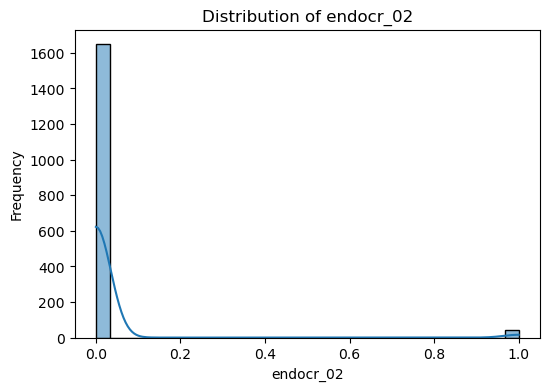

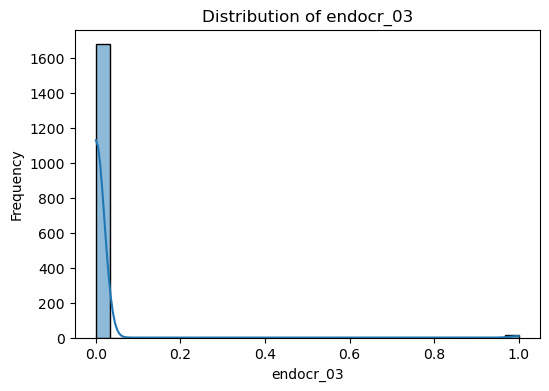

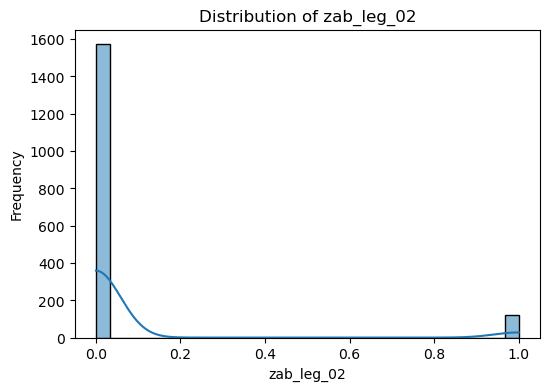

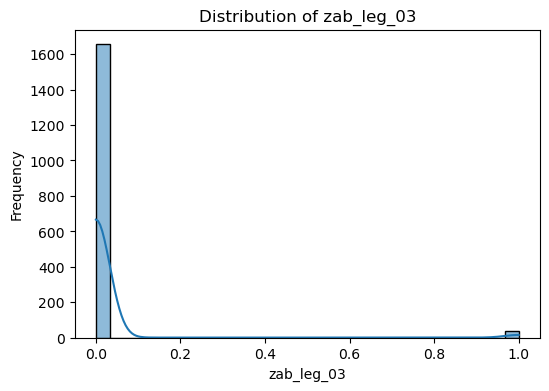

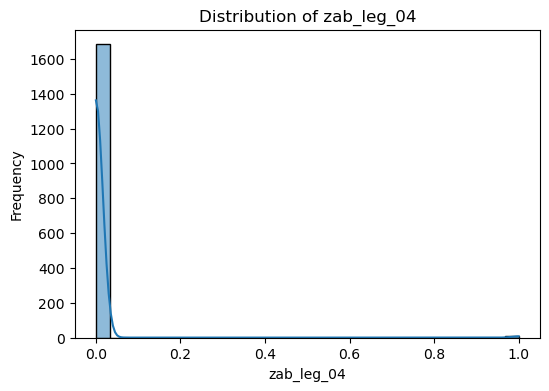

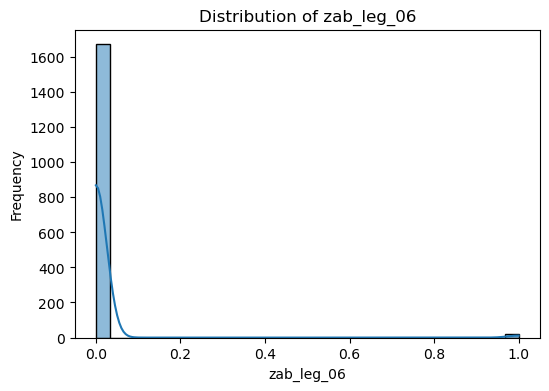

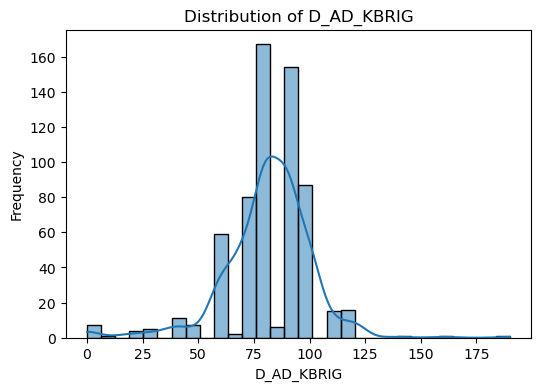

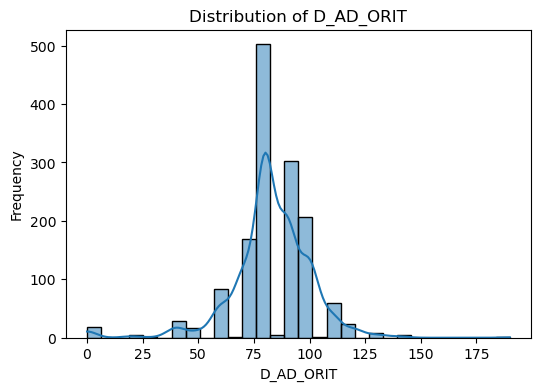

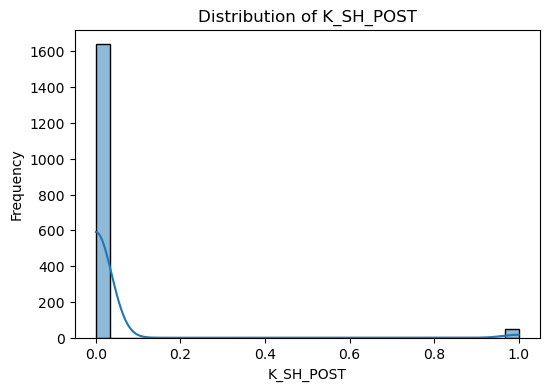

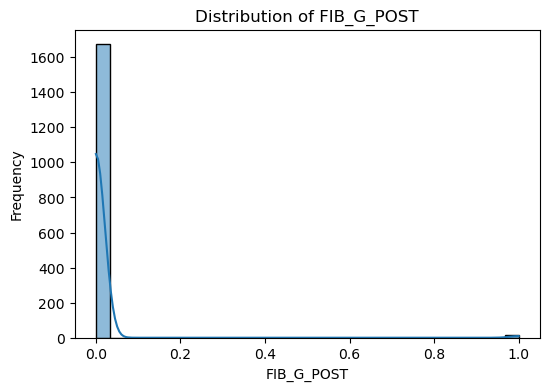

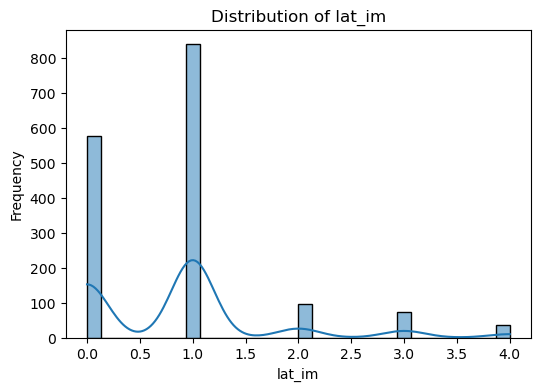

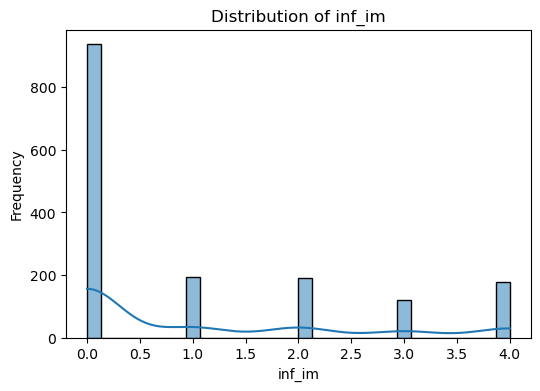

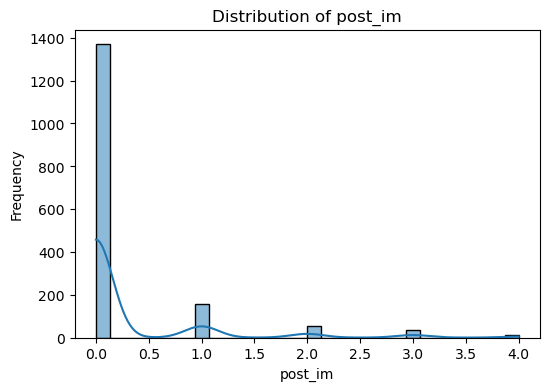

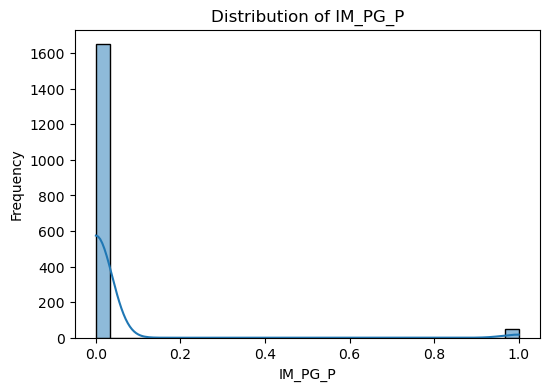

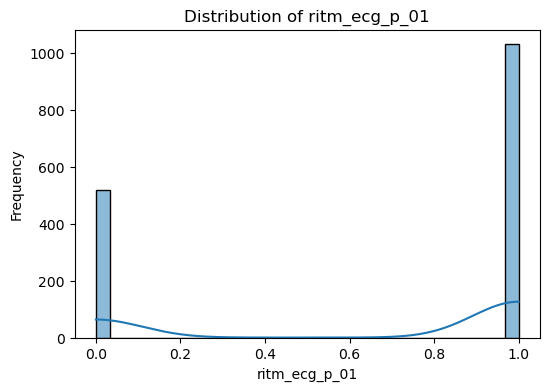

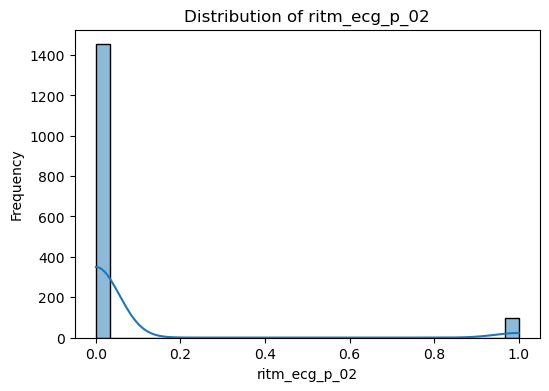

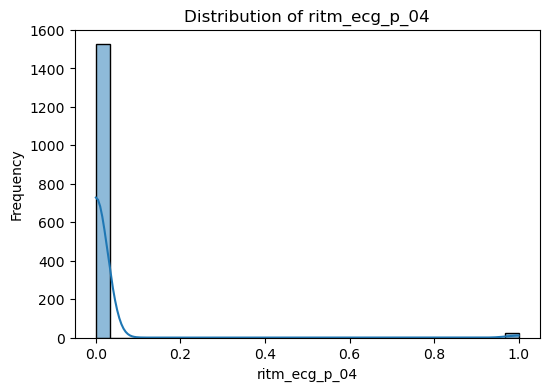

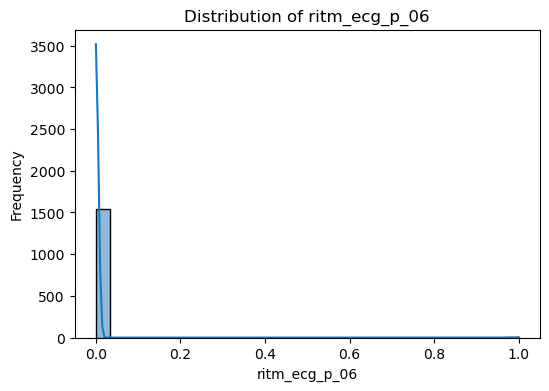

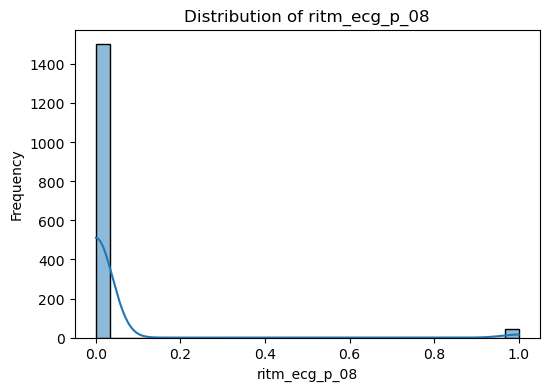

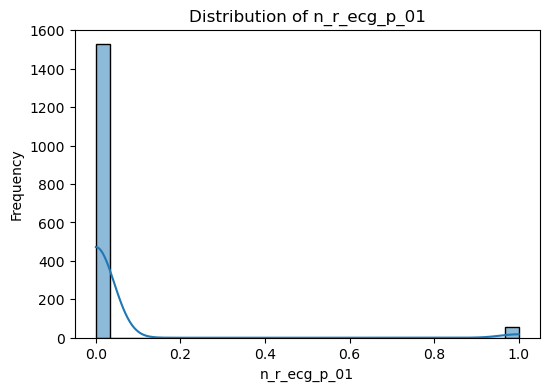

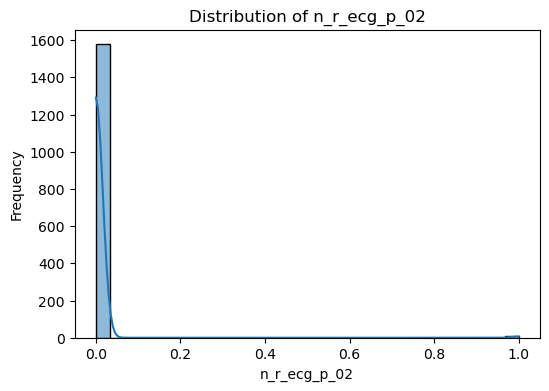

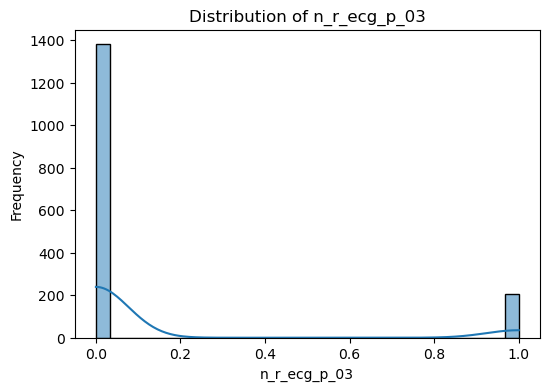

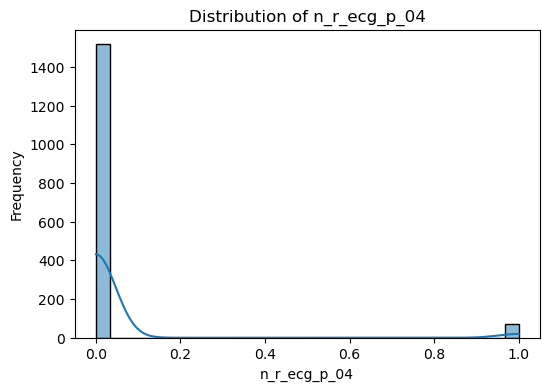

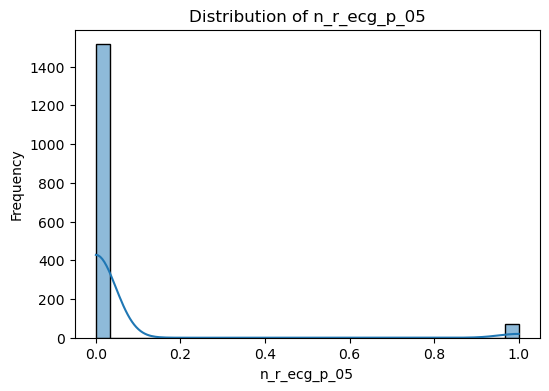

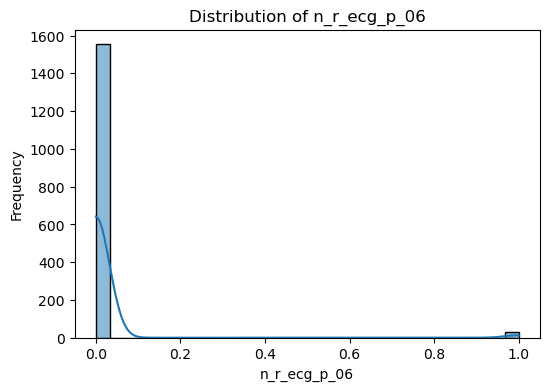

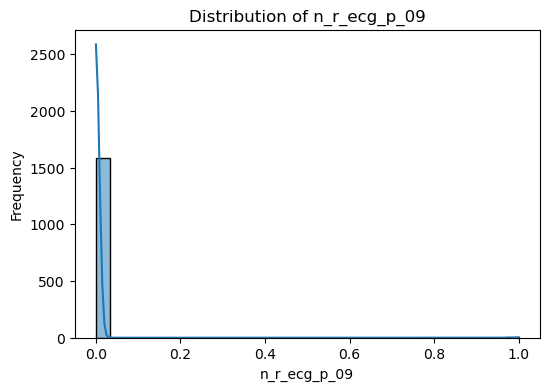

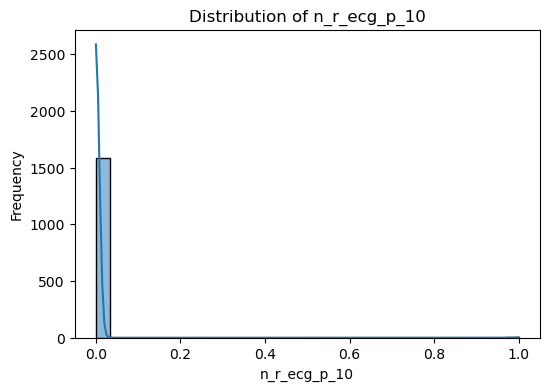

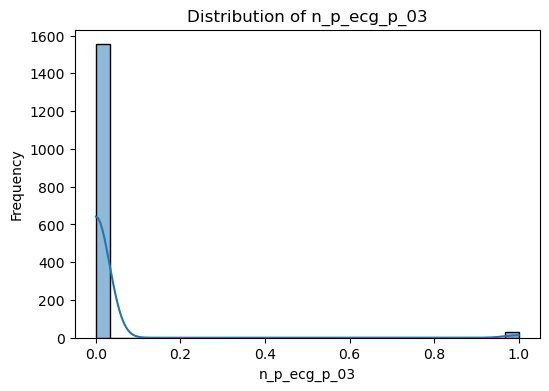

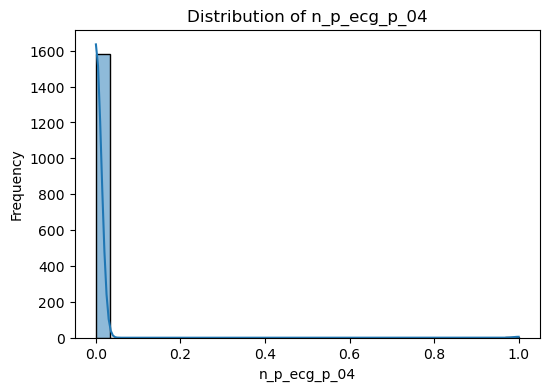

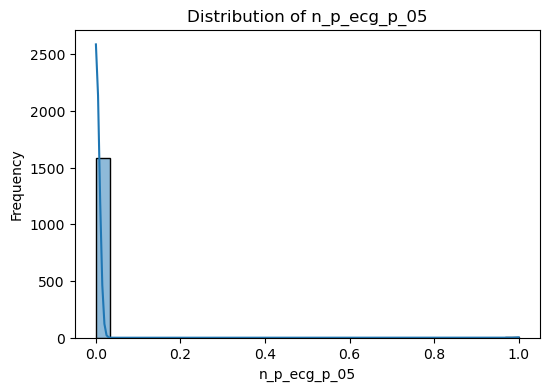

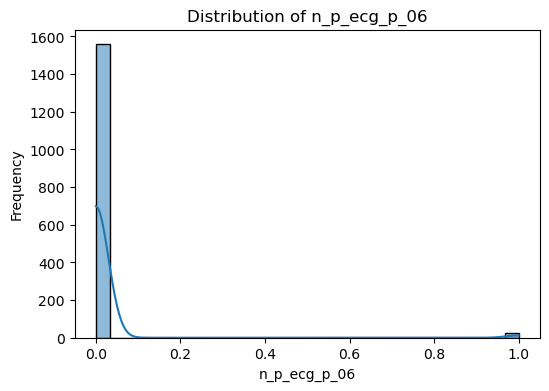

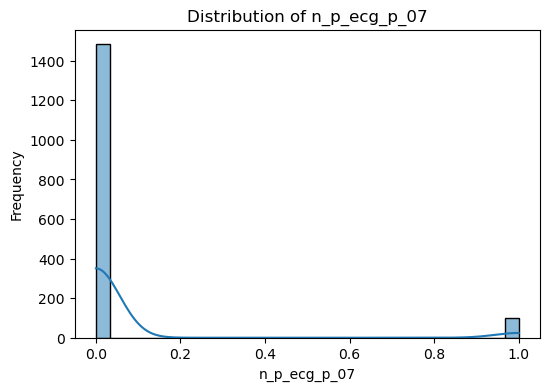

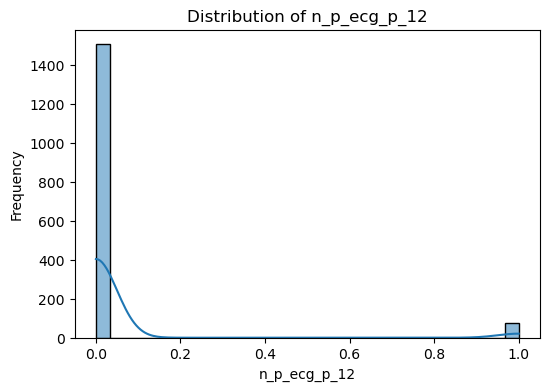

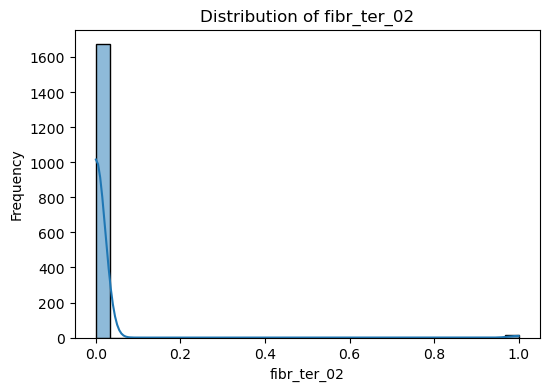

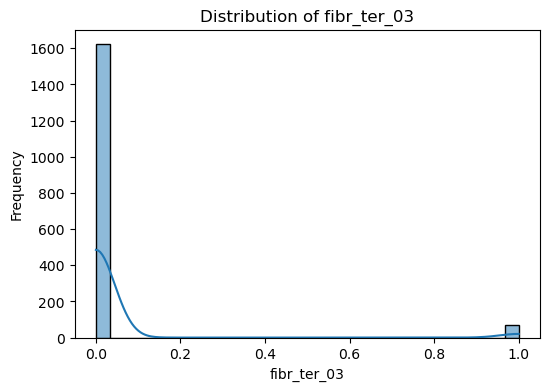

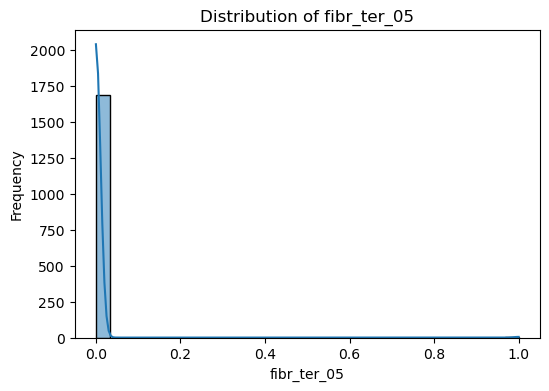

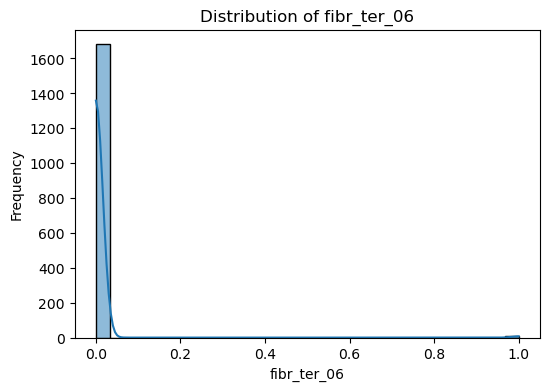

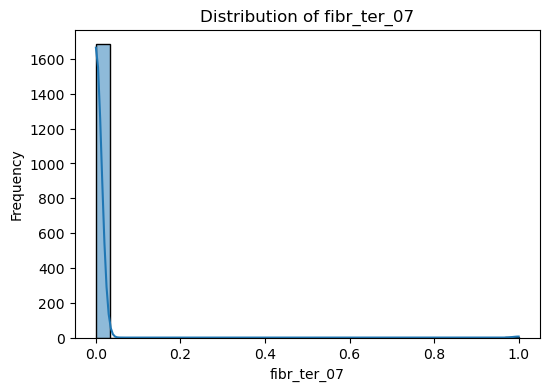

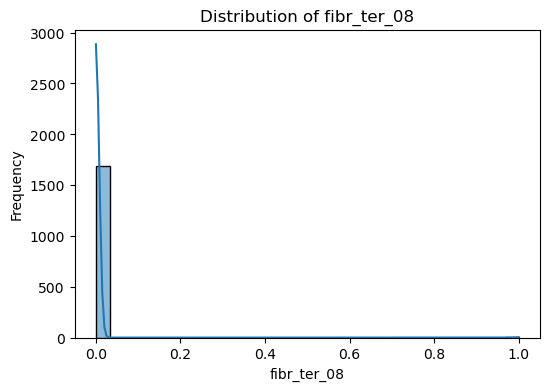

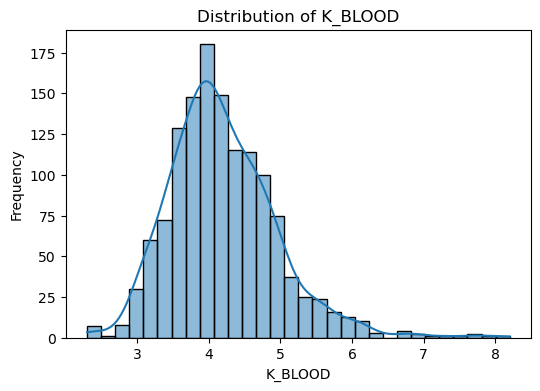

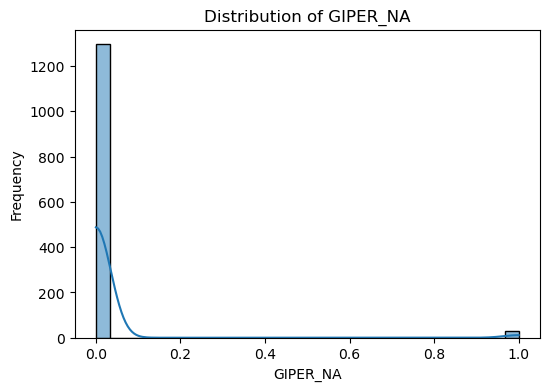

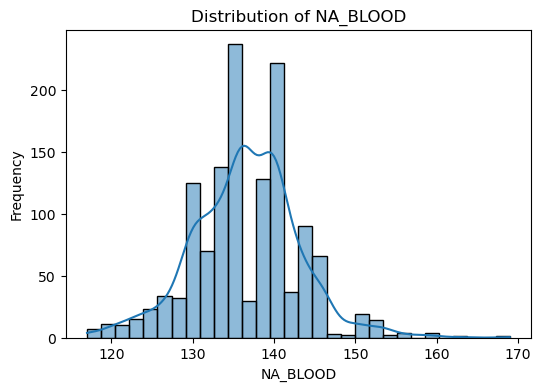

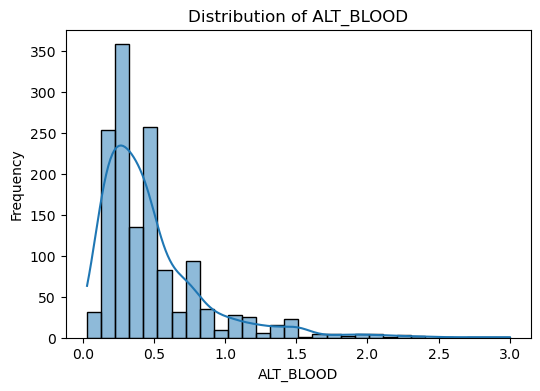

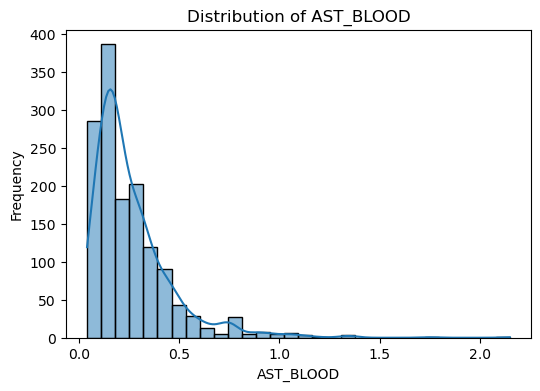

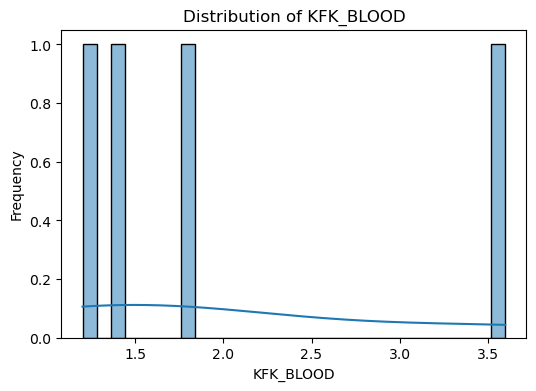

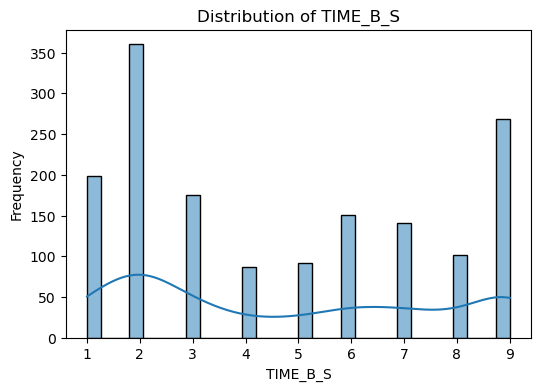

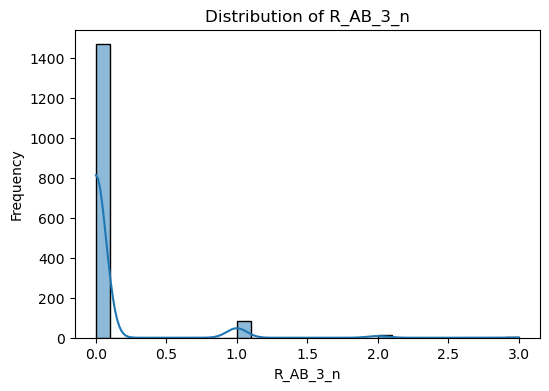

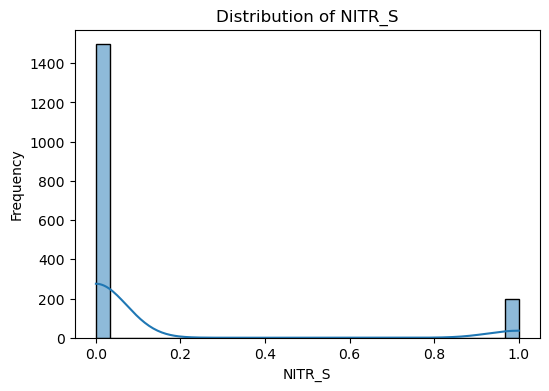

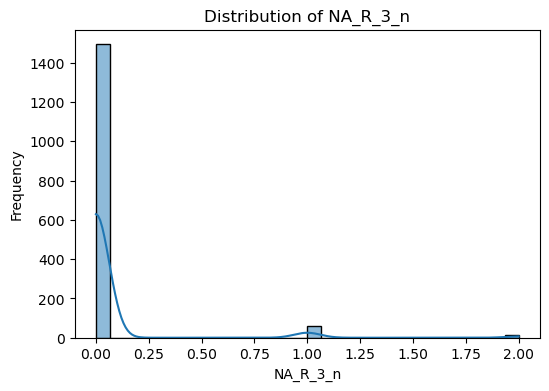

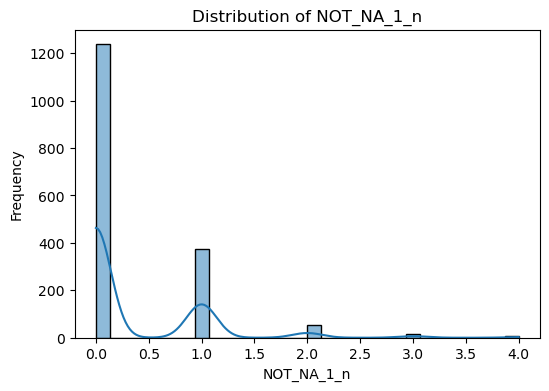

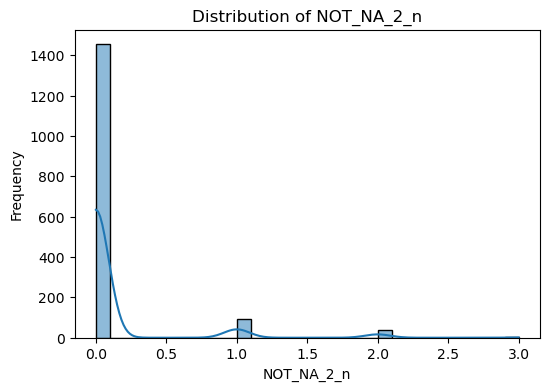

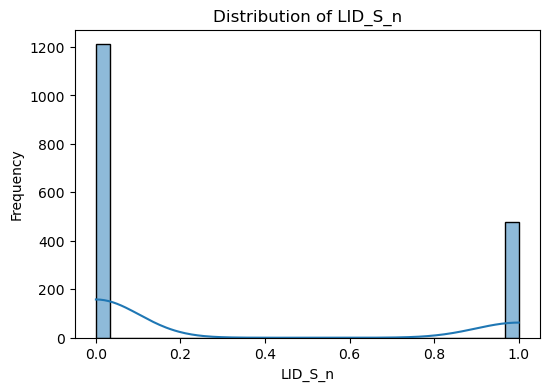

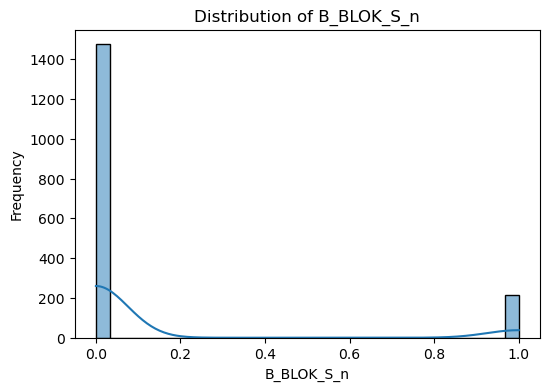

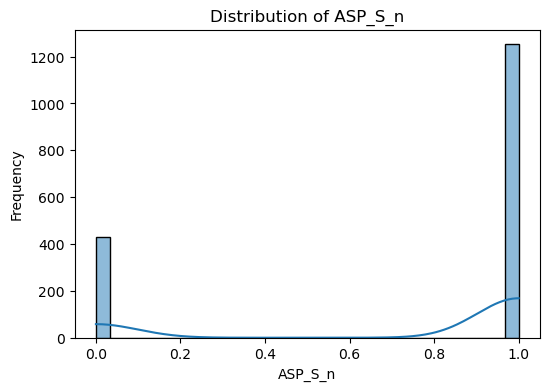

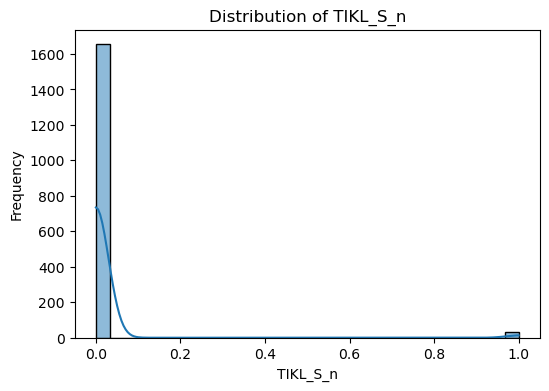

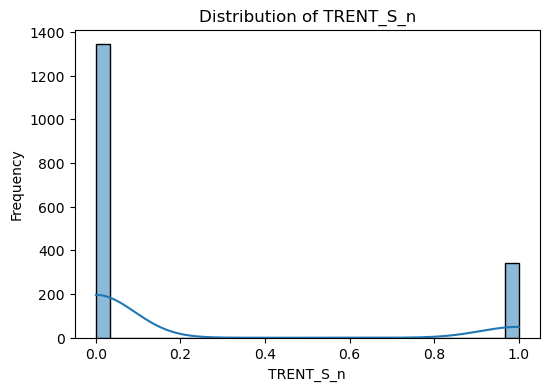

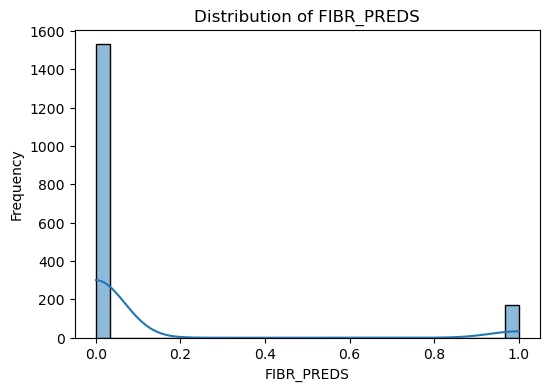

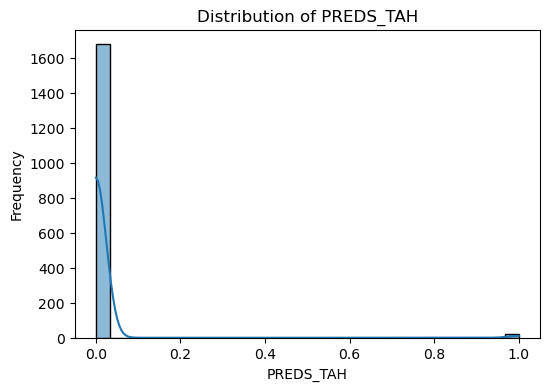

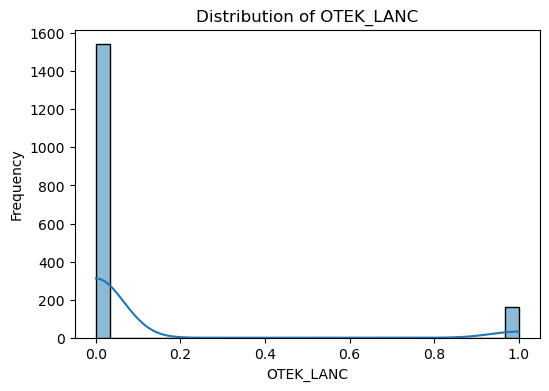

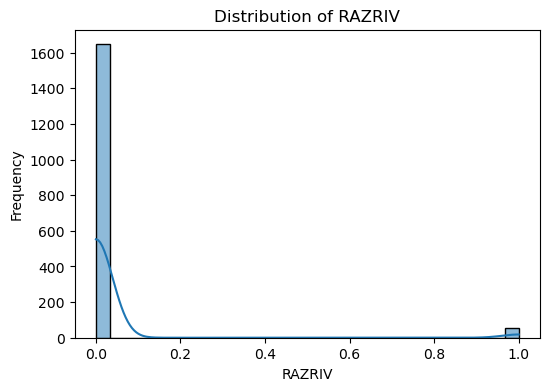

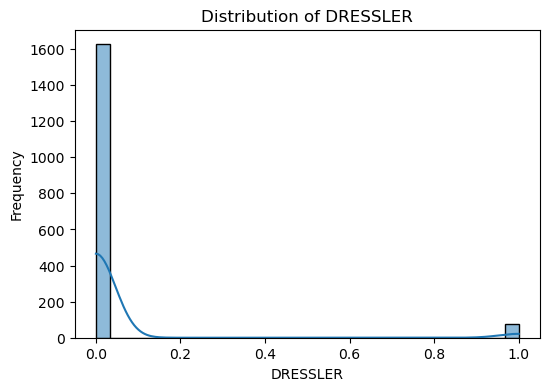

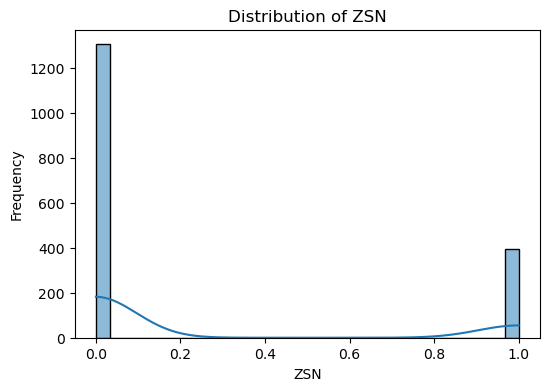

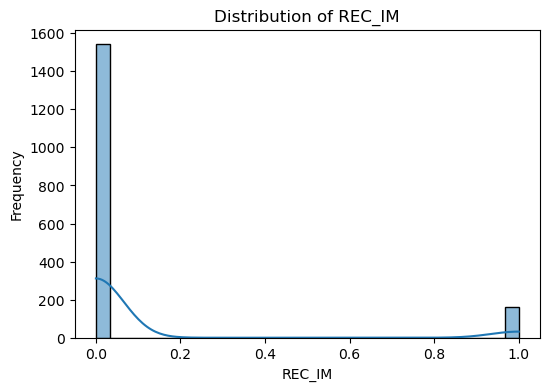

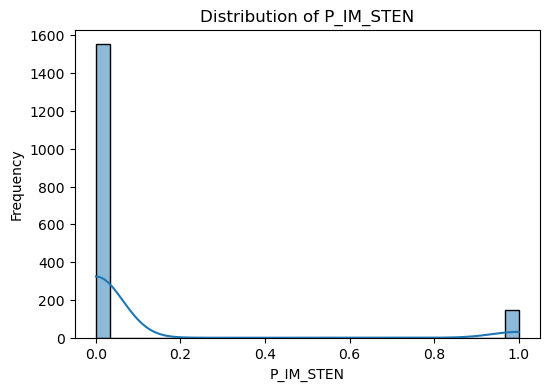

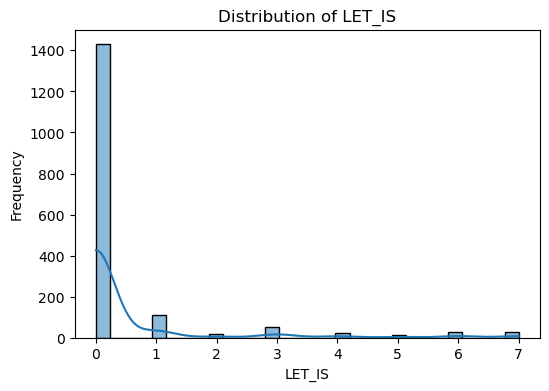

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data1_df = pd.read_csv("Myocardial Infarction.csv")

# Print data types of all columns
print("\nChecking Data Types:")
print(data1_df.dtypes)

# Check for missing values
print("\nChecking for Missing Values:")
print(data1_df.isnull().sum())

# Identify numerical columns
numerical_columns = data1_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nNumerical Columns:", numerical_columns)

# Verify LET_IS as the target variable
if "LET_IS" in data1_df.columns:
    print("\nVerifying Target Variable (LET_IS):")
    print("Unique values:", data1_df["LET_IS"].unique())
    print("Value counts:")
    print(data1_df["LET_IS"].value_counts())
    print("Data type:", data1_df["LET_IS"].dtype)

# Basic statistics of numerical columns
print("\nSummary Statistics:")
print(data1_df.describe())

# Plot distributions of numerical columns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data1_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [53]:
import pandas as pd

# Load the dataset
file_path = "Myocardial Infarction.csv"
df = pd.read_csv(file_path)

# Identify continuous (float) and categorical (int) columns
continuous_cols = df.select_dtypes(include=['float64']).columns
categorical_cols = df.select_dtypes(include=['int64']).columns

# Print sample data
print("Sample Continuous Data:\n", df[continuous_cols].head())
print("\nSample Categorical Data:\n", df[categorical_cols].head())


Sample Continuous Data:
     AGE  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  SIM_GIPERT  \
0  77.0       2.0        1.0        1.0       2.0       NaN  3.0         0.0   
1  55.0       1.0        0.0        0.0       0.0       0.0  0.0         0.0   
2  52.0       0.0        0.0        0.0       2.0       NaN  2.0         0.0   
3  68.0       0.0        0.0        0.0       2.0       NaN  2.0         0.0   
4  60.0       0.0        0.0        0.0       2.0       NaN  3.0         0.0   

   DLIT_AG  ZSN_A  ...  NOT_NA_1_n  NOT_NA_2_n  NOT_NA_3_n  LID_S_n  \
0      7.0    0.0  ...         0.0         0.0         0.0      1.0   
1      0.0    0.0  ...         1.0         0.0         0.0      1.0   
2      2.0    0.0  ...         3.0         2.0         2.0      1.0   
3      3.0    1.0  ...         0.0         0.0         0.0      0.0   
4      7.0    0.0  ...         0.0         0.0         0.0      0.0   

   B_BLOK_S_n  ANT_CA_S_n  GEPAR_S_n  ASP_S_n  TIKL_S_n  TRENT_S_n 

In [56]:
import pandas as pd

# Load the dataset
file_path = "Myocardial Infarction.csv"
df = pd.read_csv(file_path)

# Initialize an empty list to store column names with null values
null_columns = []

# Loop through each column and check for null values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        null_columns.append(col)

# Print the list of columns with null values
print("Columns with null values:", null_columns)


Columns with null values: ['AGE', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_

In [60]:
import pandas as pd

# Load the dataset
file_path = "Myocardial Infarction.csv"
df = pd.read_csv(file_path)

# Initialize lists for numerical categorical and continuous columns
numerical_categorical = []
numerical_continuous = []

# Loop through numerical columns and classify them
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    if df[col].nunique() <= 10:  # If unique values are 10 or less, consider it categorical
        numerical_categorical.append(col)
    else:
        numerical_continuous.append(col)

# Print the lists
print("Numerical Categorical Columns:", numerical_categorical)
print("\nNumerical Continuous Columns:", numerical_continuous)


Numerical Categorical Columns: ['SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06',

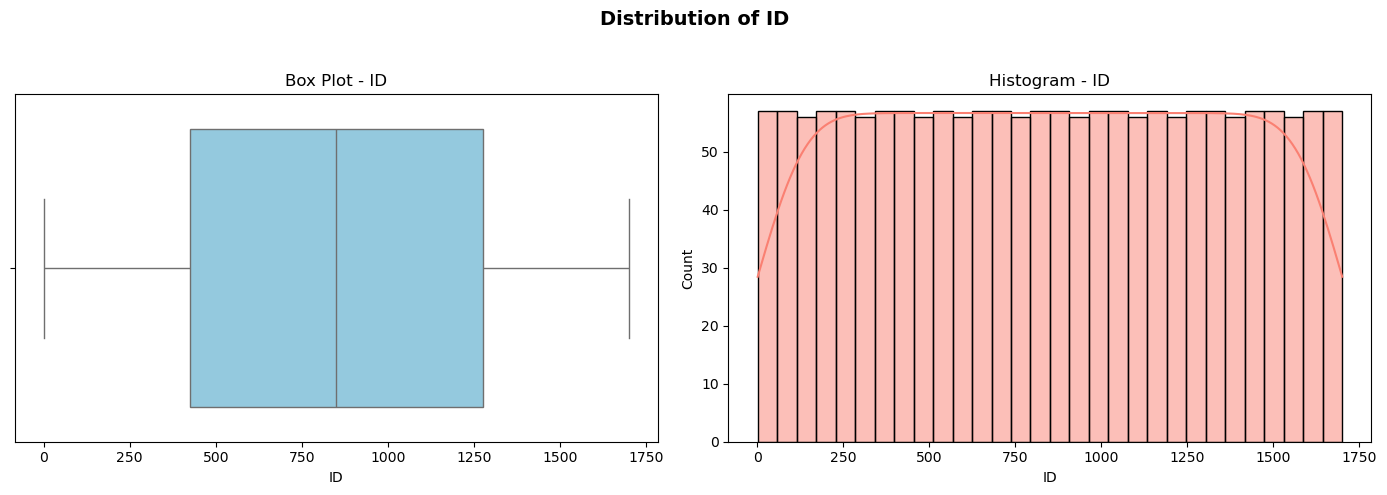

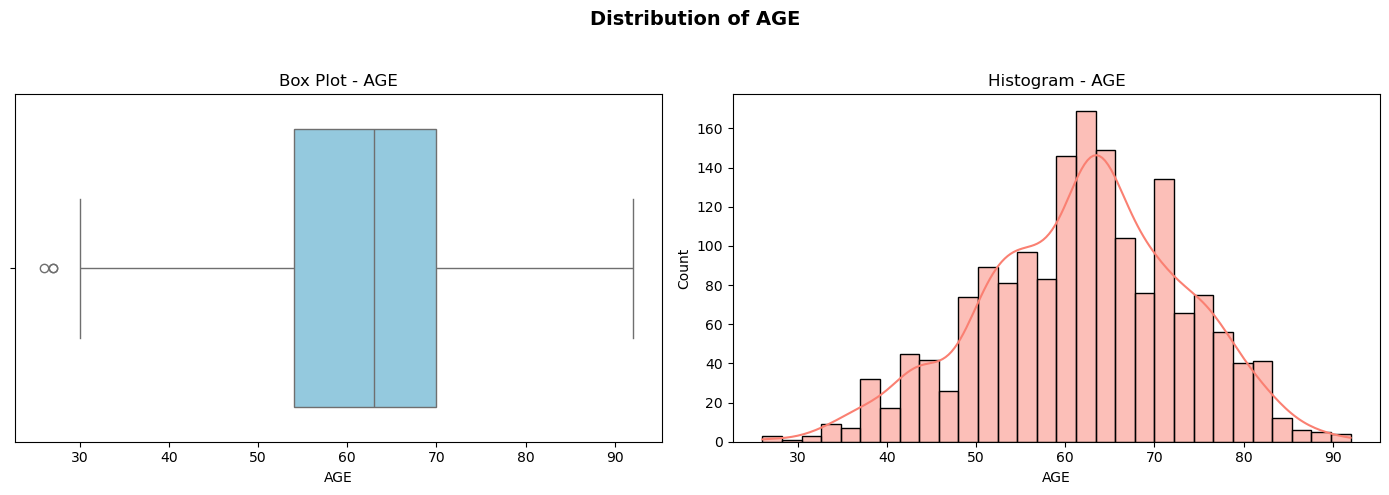

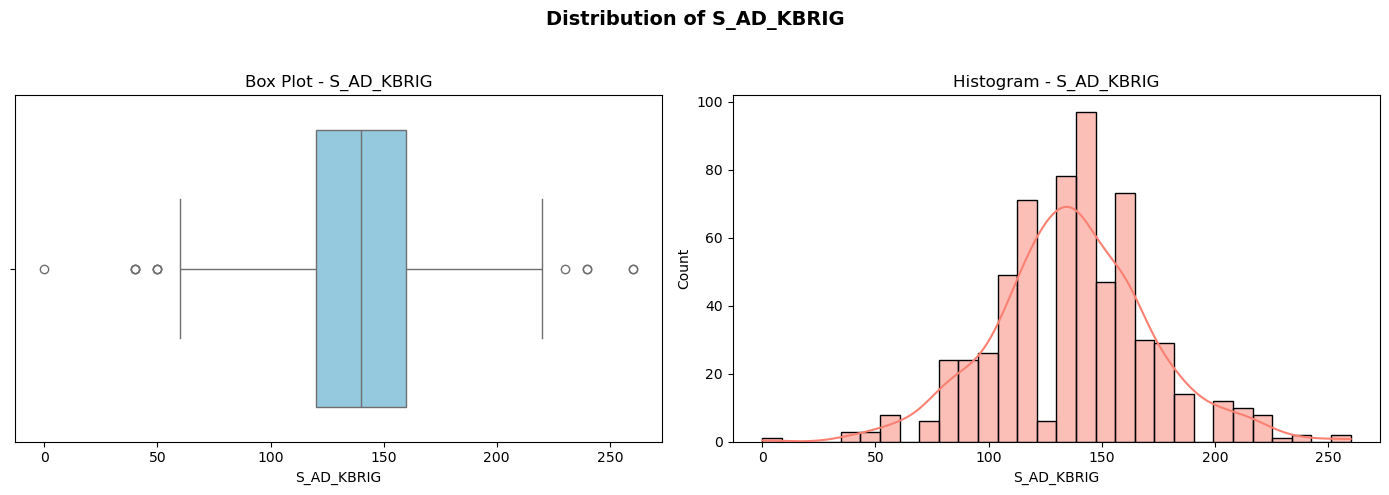

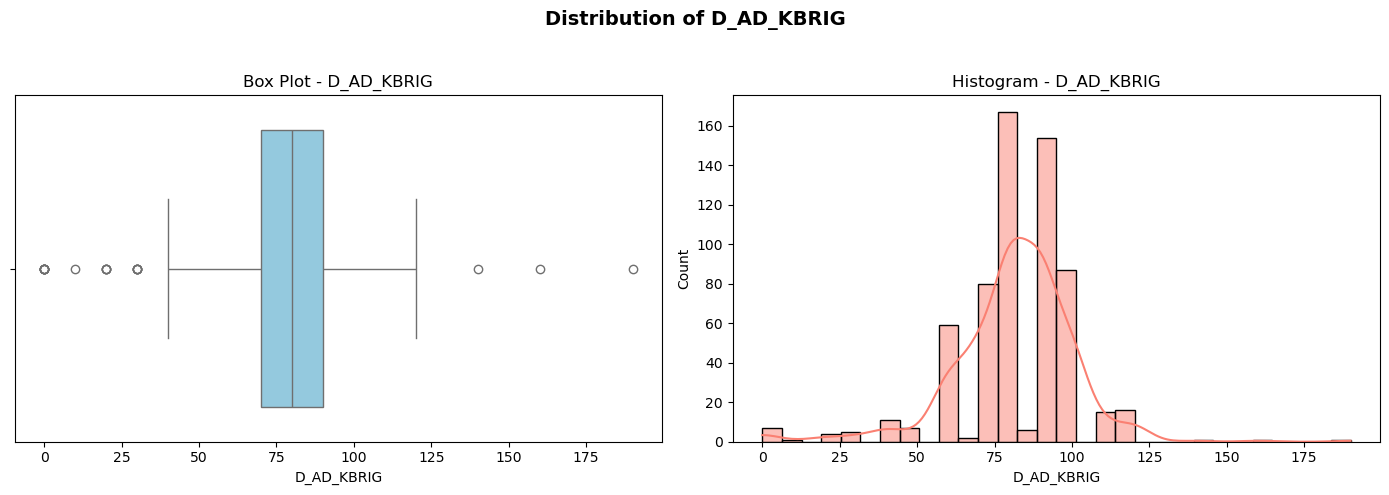

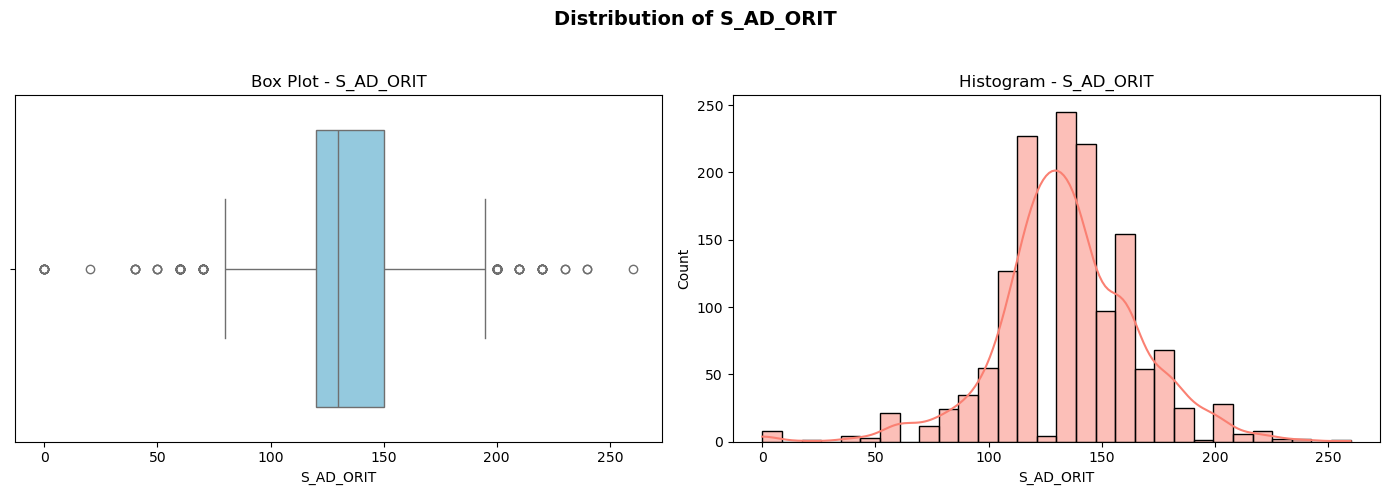

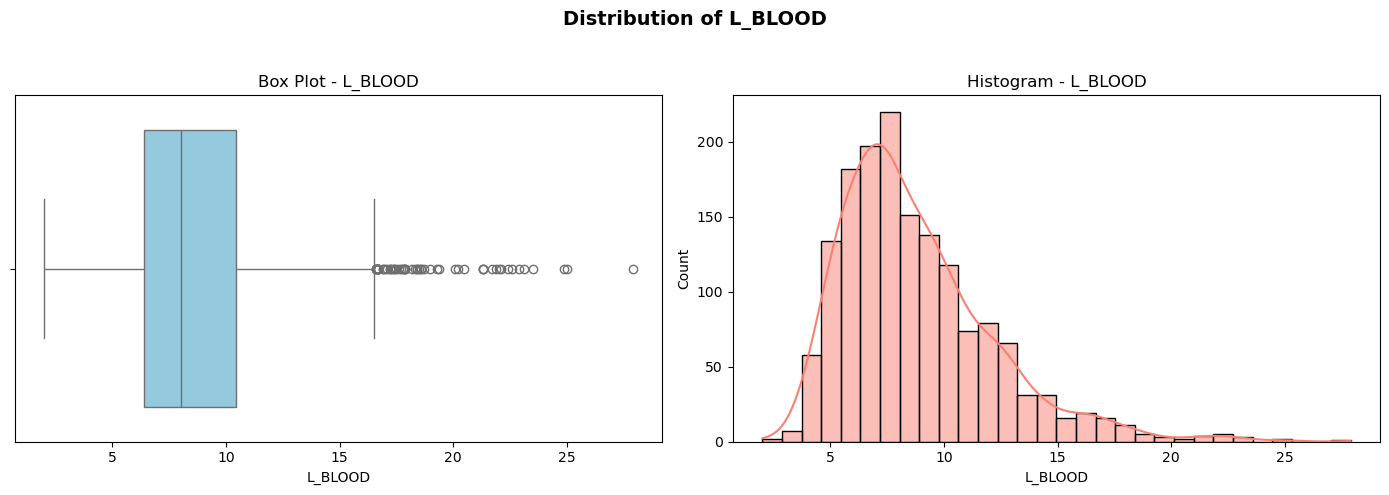

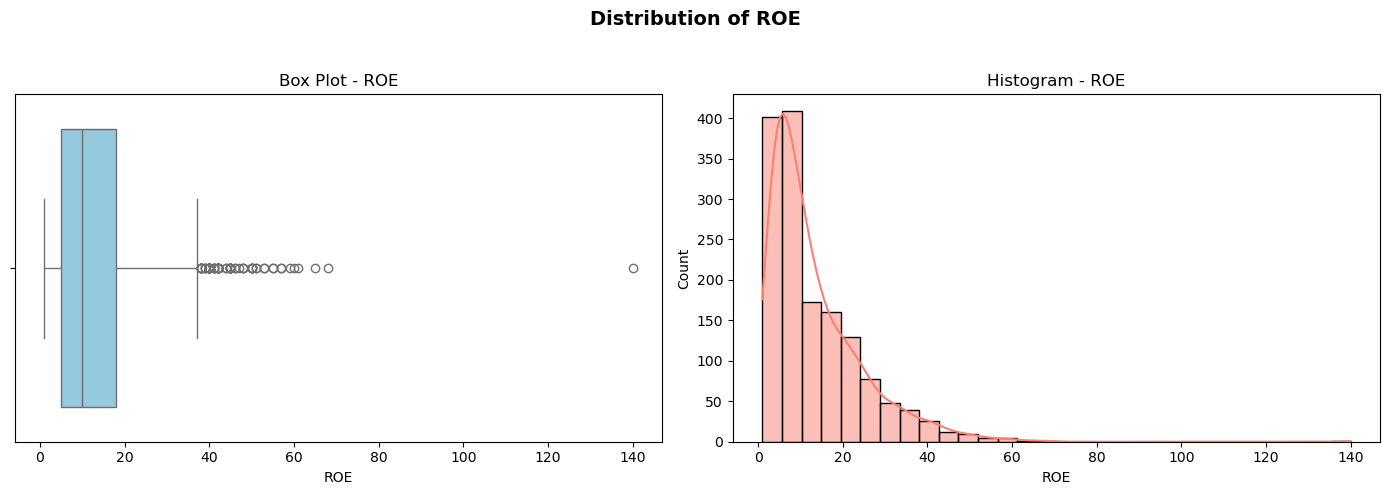

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("Myocardial Infarction.csv")

# Step 2: Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 3: Identify continuous columns (numeric with more than 10 unique values)
continuous_columns = [col for col in numerical_columns if df[col].nunique() > 10]

# Step 4: Plot each continuous feature
for feature in continuous_columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Boxplot
    sns.boxplot(x=df[feature], ax=axes[0], color='skyblue')
    axes[0].set_title(f'Box Plot - {feature}', fontsize=12)
    axes[0].set_xlabel(feature)

    # Histogram
    sns.histplot(df[feature], kde=True, bins=30, ax=axes[1], color='salmon')
    axes[1].set_title(f'Histogram - {feature}', fontsize=12)
    axes[1].set_xlabel(feature)

    # Display plots
    plt.suptitle(f'Distribution of {feature}', fontsize=14, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [65]:


# Load the dataset
file_path = "Myocardial Infarction.csv"
df = pd.read_csv(file_path)

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Handle missing values (optional: fill NaN with median)
df_encoded = df_encoded.fillna(df_encoded.median())

# Define features (X) and target variable (y) - assuming the last column is the target
X = df_encoded.iloc[:, :-1]  # All columns except the last
y = df_encoded.iloc[:, -1]   # Assuming the last column is the target

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy:.4f}")


Random Forest Model Accuracy: 0.9294


Model Accuracy: 0.9294

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       288
           1       0.64      0.70      0.67        23
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00        11
           4       1.00      0.12      0.22         8
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         4

    accuracy                           0.93       340
   macro avg       0.45      0.35      0.36       340
weighted avg       0.91      0.93      0.91       340



C:\Users\akula\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akula\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akula\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


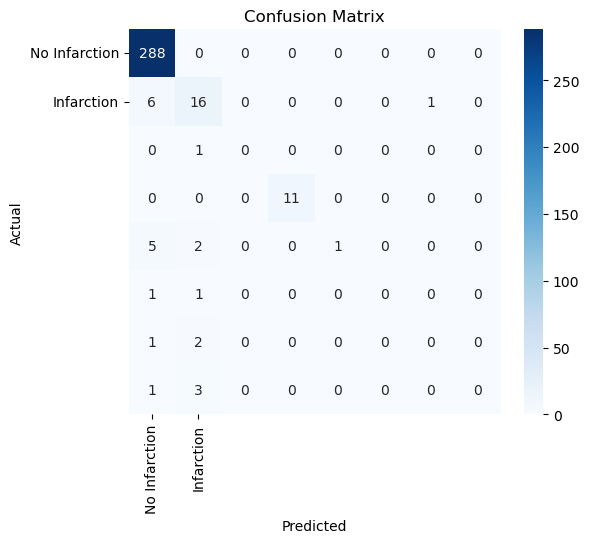

C:\Users\akula\AppData\Local\Temp\ipykernel_22068\4288882887.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")


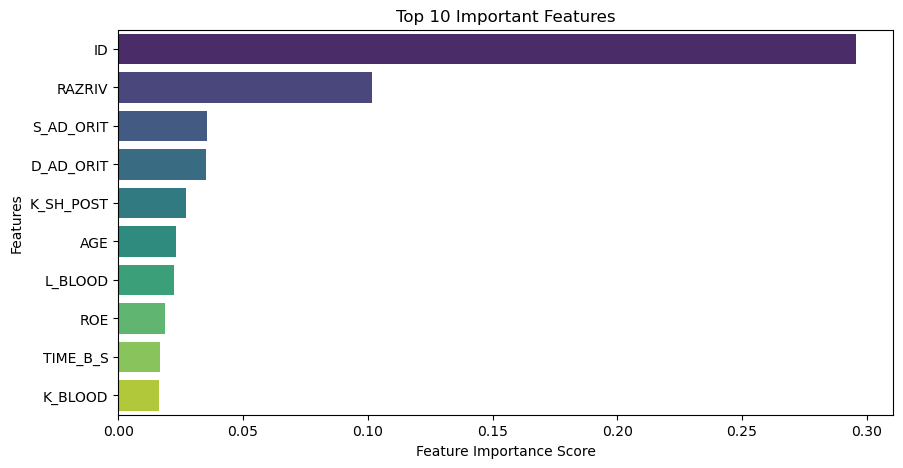

In [69]:
# Load dataset
file_path = "Myocardial Infarction.csv"
df = pd.read_csv(file_path)

# Step 1: Handling Missing Values
df.fillna(df.median(), inplace=True)  # Fill NaNs with median values

# Step 2: Identify Categorical and Numerical Columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 3: Apply One-Hot Encoding for Categorical Columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Step 4: Define Features (X) and Target Variable (y)
X = df_encoded.drop(columns=['LET_IS'])  # Assuming 'LET_IS' is the target variable (modify if needed)
y = df_encoded['LET_IS']

# Step 5: Split into Training and Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Feature Scaling (for continuous variables)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Train the Model (Random Forest Classifier)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 8: Make Predictions
y_pred = rf_model.predict(X_test)

# Step 9: Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 10: Display Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=["No Infarction", "Infarction"], yticklabels=["No Infarction", "Infarction"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 11: Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features")
plt.show()

In [71]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1)
xgb_model.fit(X_train, y_train)


ModuleNotFoundError: No module named 'xgboost'

### Random forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
# Initialize Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9206
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       288
           1       0.82      0.61      0.70        23
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00        11
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         4

    accuracy                           0.92       340
   macro avg       0.34      0.33      0.33       340
weighted avg       0.87      0.92      0.89       340



C:\Users\akula\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akula\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\akula\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\Users\akula\AppData\Local\Temp\ipykernel_22068\3770071715.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette="coolwarm")


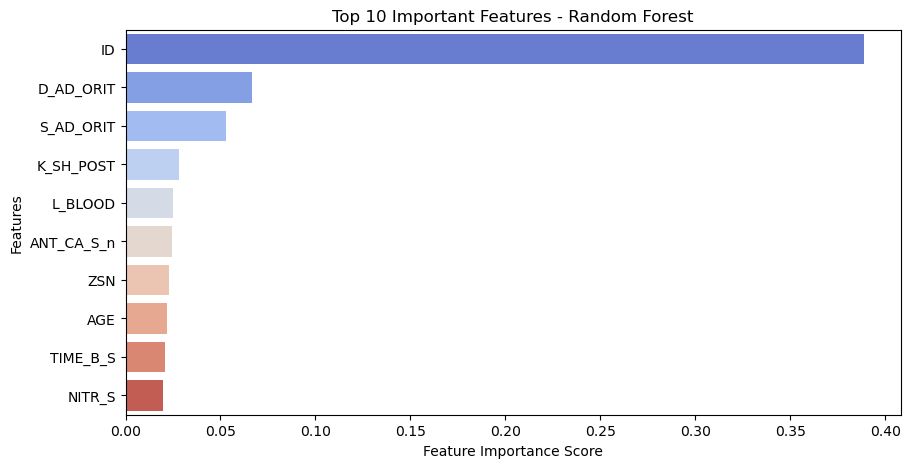

In [98]:
# Plot feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="coolwarm")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features - Random Forest")
plt.show()


Decision Tree Model Accuracy: 0.9982517482517482
Random Forest Model Accuracy: 0.9982517482517482
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       289
           1       1.00      1.00      1.00       283

    accuracy                           1.00       572
   macro avg       1.00      1.00      1.00       572
weighted avg       1.00      1.00      1.00       572

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       289
           1       1.00      1.00      1.00       283

    accuracy                           1.00       572
   macro avg       1.00      1.00      1.00       572
weighted avg       1.00      1.00      1.00       572



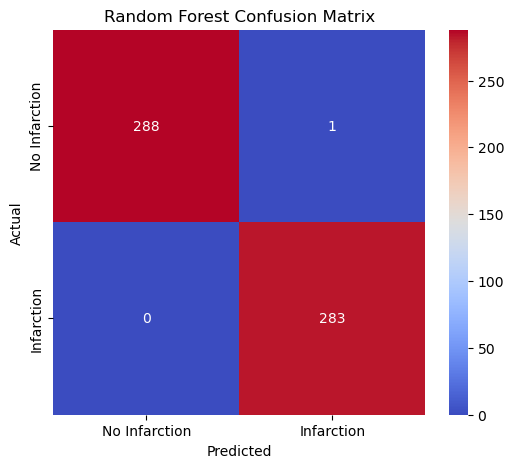

C:\Users\akula\AppData\Local\Temp\ipykernel_22068\3522670927.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette="magma")


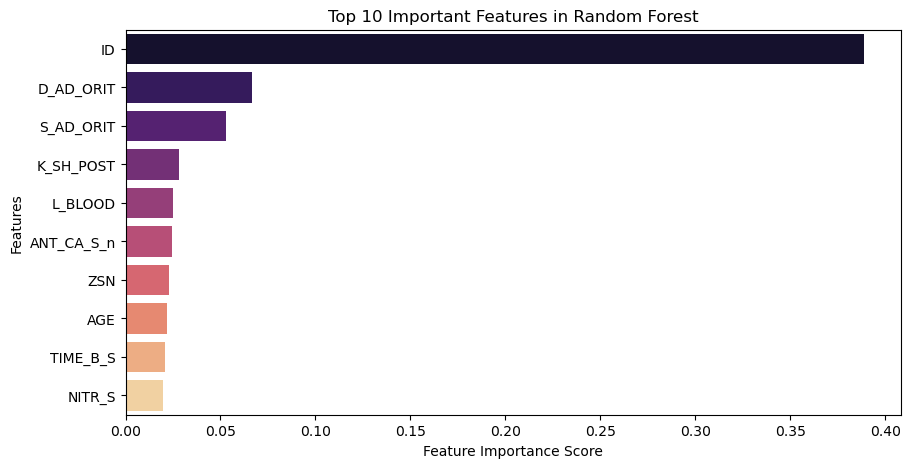

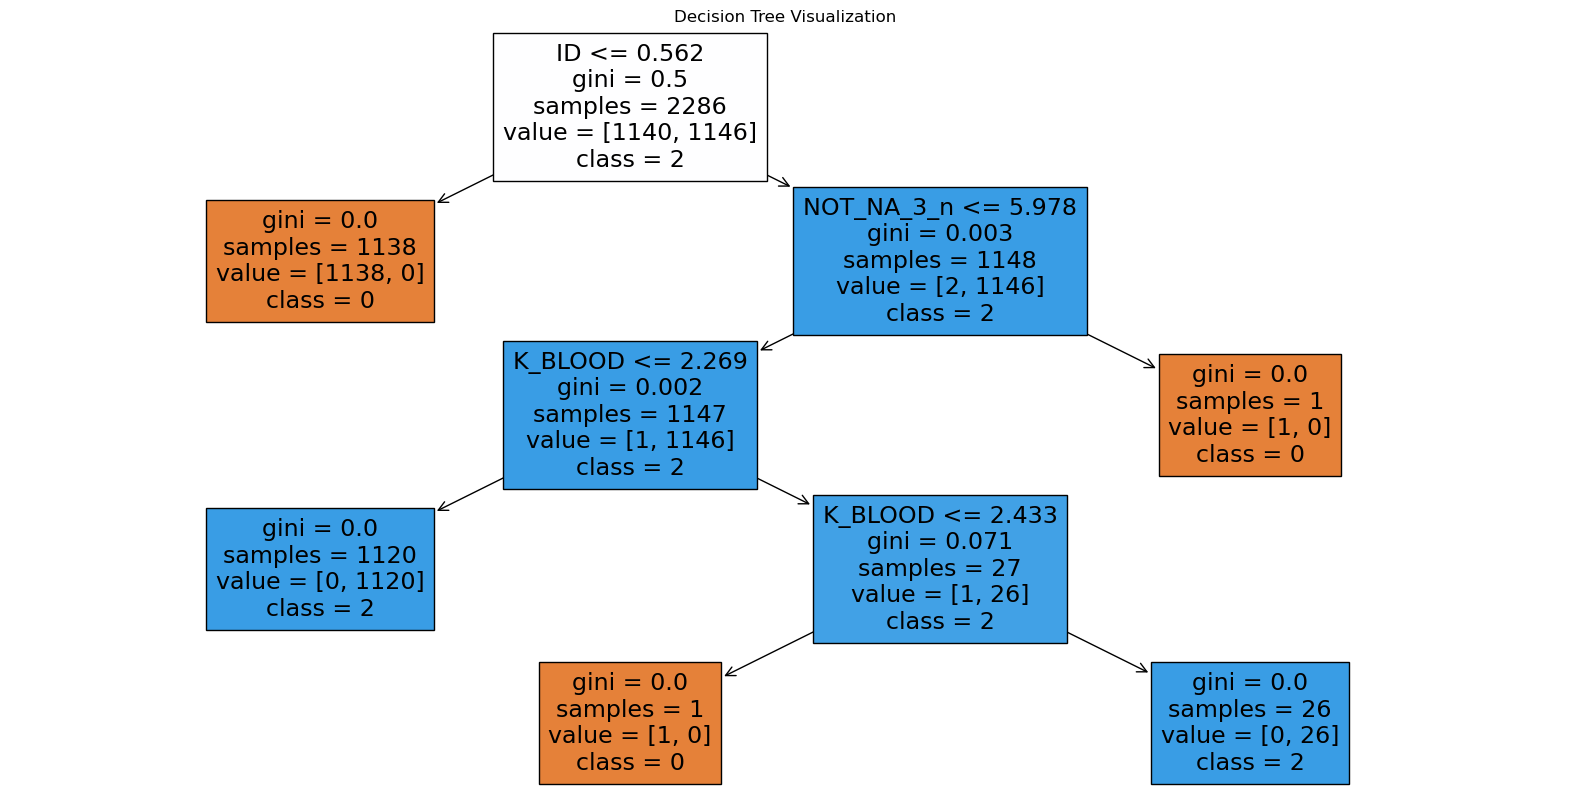

In [96]:
# Load dataset
file_path = "Myocardial Infarction.csv"
df = pd.read_csv(file_path)

# Step 1: Handle Missing Values
df.fillna(df.median(), inplace=True)

# Step 2: Identify Categorical and Numerical Columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 3: Apply One-Hot Encoding for Categorical Columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Step 4: Define Features (X) and Target Variable (y)
target_column = 'LET_IS'
X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

# Step 5: Handle Imbalanced Data (Optional)
df_balanced = pd.concat([X, y], axis=1)
majority_class = df_balanced[df_balanced[target_column] == 0]
minority_class = df_balanced[df_balanced[target_column] == 1]

# Upsample the minority class
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)
df_balanced = pd.concat([majority_class, minority_upsampled])

# Split dataset again
X_train, X_test, y_train, y_test = train_test_split(df_balanced.drop(columns=[target_column]), df_balanced[target_column], test_size=0.2, random_state=42)

# Step 6: Feature Scaling (for continuous variables)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Train Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Step 8: Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 9: Make Predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Step 10: Evaluate Models
print("Decision Tree Model Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))

# Handle UndefinedMetricWarning
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt, zero_division=1))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf, zero_division=1))

# Step 11: Display Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='coolwarm', xticklabels=["No Infarction", "Infarction"], yticklabels=["No Infarction", "Infarction"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Step 12: Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="magma")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features in Random Forest")
plt.show()

# Step 13: Decision Tree Visualization
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=[str(cls) for cls in y.unique()], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

## decision tree

Decision Tree Model Accuracy: 0.9982517482517482
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       289
           1       1.00      1.00      1.00       283

    accuracy                           1.00       572
   macro avg       1.00      1.00      1.00       572
weighted avg       1.00      1.00      1.00       572



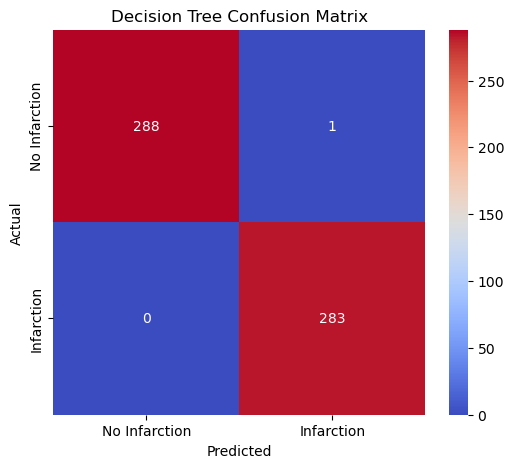

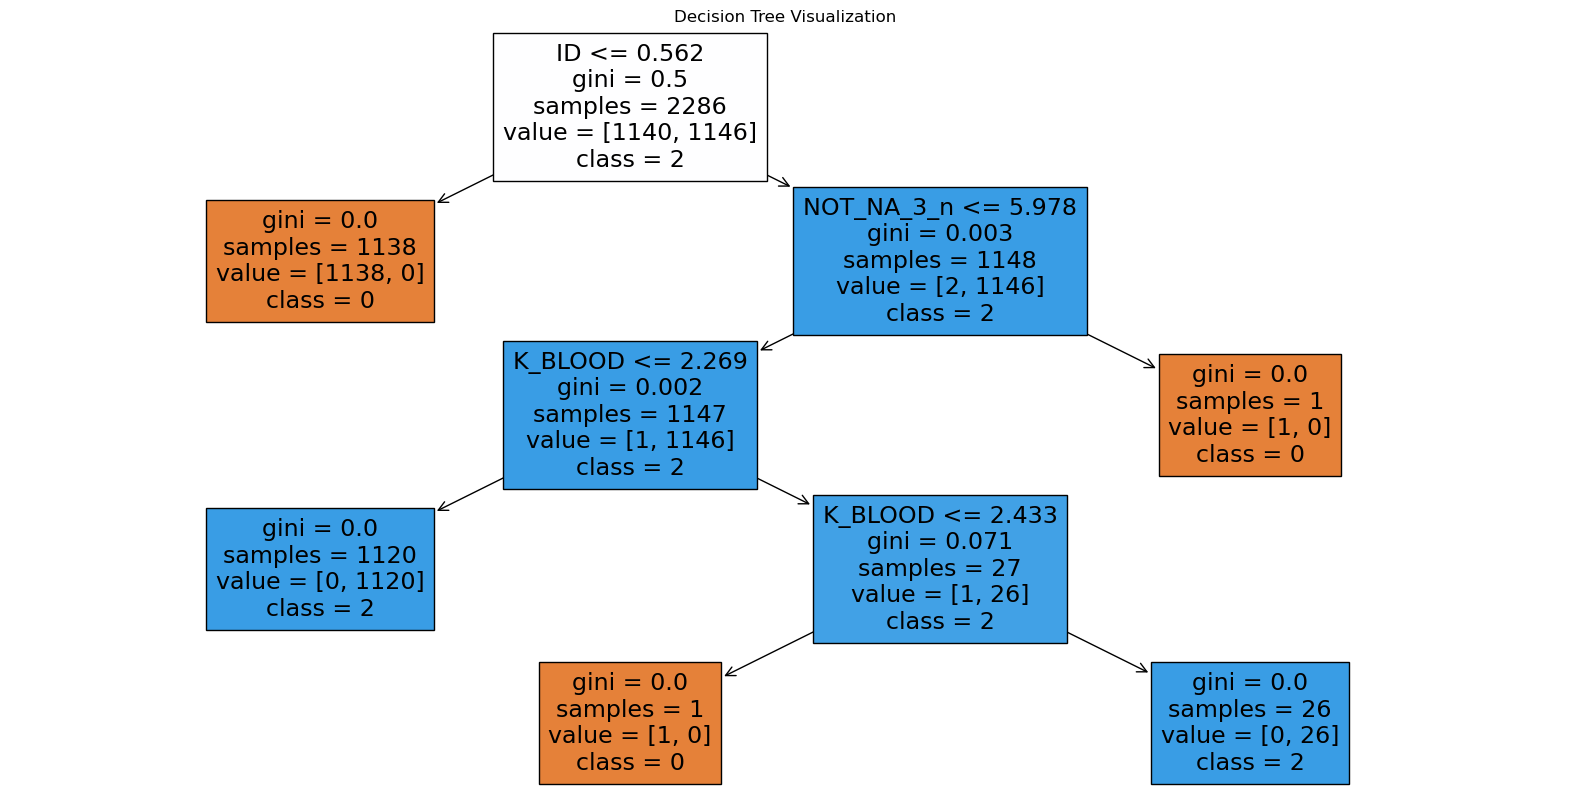

In [101]:
# Load dataset
file_path = "Myocardial Infarction.csv"
df = pd.read_csv(file_path)

# Handle Missing Values
df.fillna(df.median(), inplace=True)

# Identify Categorical and Numerical Columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Define Features and Target Variable
target_column = 'LET_IS'
X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

# Handle Imbalanced Data (Optional)
df_balanced = pd.concat([X, y], axis=1)
majority_class = df_balanced[df_balanced[target_column] == 0]
minority_class = df_balanced[df_balanced[target_column] == 1]
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)
df_balanced = pd.concat([majority_class, minority_upsampled])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df_balanced.drop(columns=[target_column]), df_balanced[target_column], test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Make Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate Model
print("Decision Tree Model Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt, zero_division=1))

# Display Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='coolwarm', xticklabels=["No Infarction", "Infarction"], yticklabels=["No Infarction", "Infarction"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Decision Tree Visualization
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=[str(cls) for cls in y.unique()], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

### Random forest

Random Forest Model Accuracy: 0.9982517482517482
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       289
           1       1.00      1.00      1.00       283

    accuracy                           1.00       572
   macro avg       1.00      1.00      1.00       572
weighted avg       1.00      1.00      1.00       572



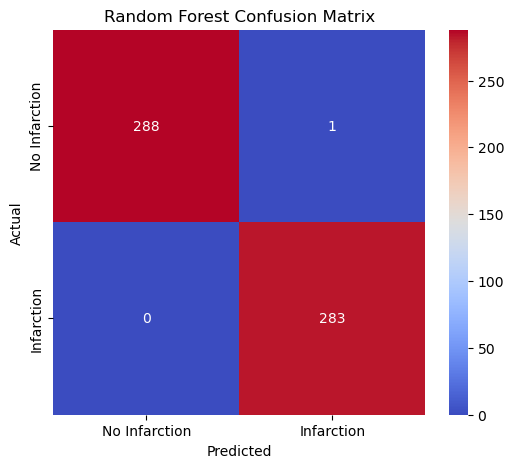

C:\Users\akula\AppData\Local\Temp\ipykernel_22068\2471799674.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette="magma")


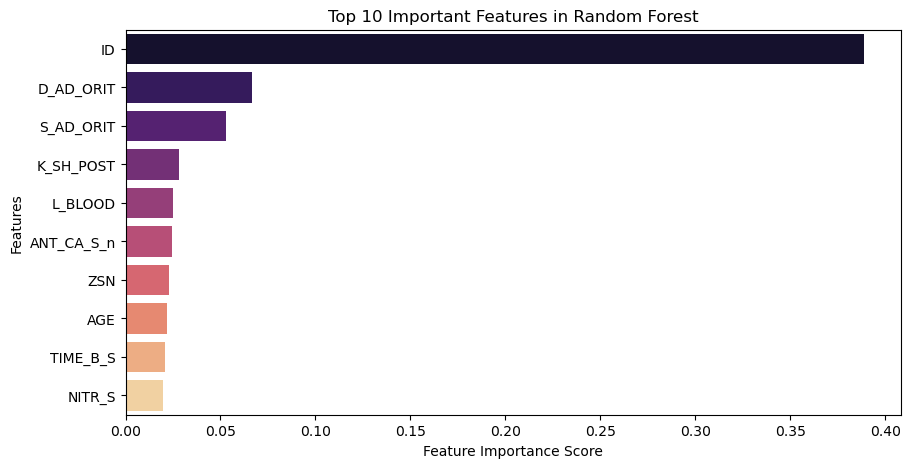

In [104]:
# Load dataset
file_path = "Myocardial Infarction.csv"
df = pd.read_csv(file_path)

# Handle Missing Values
df.fillna(df.median(), inplace=True)

# Identify Categorical and Numerical Columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Define Features and Target Variable
target_column = 'LET_IS'
X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

# Handle Imbalanced Data (Optional)
df_balanced = pd.concat([X, y], axis=1)
majority_class = df_balanced[df_balanced[target_column] == 0]
minority_class = df_balanced[df_balanced[target_column] == 1]
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)
df_balanced = pd.concat([majority_class, minority_upsampled])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df_balanced.drop(columns=[target_column]), df_balanced[target_column], test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Model
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf, zero_division=1))

# Display Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='coolwarm', xticklabels=["No Infarction", "Infarction"], yticklabels=["No Infarction", "Infarction"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="magma")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features in Random Forest")
plt.show()